<a href="https://colab.research.google.com/github/joaquinmenendez/curso_phyton/blob/master/Propuesta_curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploración y visualización de datos en Python
Docentes a cargo: [Joaquín Menéndez](https://www.linkedin.com/in/joaquin-menendez/) y Fernando Binder

Tanto este curso como el curso `Introducción a Python para ciencia de datos e IA` pueden accederse en el siguiente repositorio [JIS-2020](https://github.com/joaquinmenendez/JIS-2020)

## Temas

1. Introducción a Numpy y Pandas
    - `array`, matrices, `Series` y `DataFrames`
    - Leer archivos  
    - Interactuar con nuestro dataset (indexing, filtering, merge)
2. Análisis Exploratorio de Datos (PADCHEST)
    - Análisis descriptivo (none values, media, percentiles, outliers) 
    - Plotear los graficos mas comunes (barras, boxplot, lineplot, matrix de correlaciones) 
3. Ejemplo extra de EDA
4. Introducción a la Estadística inferencial
    - Evaluar normalidad de nuestros datos
    - Comparar Hipotesis
    - Regresion Lineal usando `statsmodels`



## Links útiles
- [Anaconda](https://www.anaconda.com/products/individual)
- [Google Colab](https://colab.research.google.com/)
- [2 meses grátis de Datacamp](https://docs.microsoft.com/en-us/visualstudio/subscriptions/vs-datacamp)
- [StackOverflow](https://stackoverflow.com/)
- [Python (documentación)](https://python-reference.readthedocs.io/en/latest/index.html#)
- [Slicing](https://python-reference.readthedocs.io/en/latest/docs/brackets/slicing.html)



In [2]:
import os
import shutil
import numpy as np
import pandas as pd

In [6]:
PATH='../data/PADCHEST/' # Directorio en el cual se encuentran nuestras imagenes

# ¿Qué es el Análisis Exploratorio de Datos?

Hemos visto en el primer curso algo de Pandas y sus diferentes funciones. En este módulo, indagaremos más acerca de cómo usarlo para realizar un 'Analisis Exploratorio de los Datos' o `EDA` (en ingles, 'Exploratory Data Analysis'). El EDA es un paso previo e imprescindible a la hora de comprender los datos con los que se va a trabajar y altamente recomendable para una correcta metodología de investigación.

El objetivo de este análisis es explorar, describir, resumir y visualizar la naturaleza de los datos recogidos en las variables del proyecto o investigación de interés, mediante la aplicación de técnicas simples de resumen de datos y métodos gráficos sin asumir asunciones para su interpretación. Luego de la `Adquisicion` de los datos, el `EDA` es el segundo paso en todo proyecto de Analisis de Datos. <br>

![Ciclo de vida de los datos](https://www.eduliticas.com/wp-content/uploads/2017/05/pasos-clave-ciclo-analitico.png)

## 1. Introducción a Numpy y Pandas


### Numpy
**Arrays y Matrices**

La programación gráfica se fundamenta sobre la idea de manipular información almacenada en unas estructuras conocidas como vectores y matrices. En Python (nativo) la única forma de simular estas estructuras es usando listas y lo malo es que son muy limitadas respecto a las funciones matemáticas que permiten. Numpy viene a solucionar esa carencia ofreciéndonos un nuevo tipo de dato llamado array.

Un array es parecido a una lista en Python y de hecho se pueden crear a partir de ellas:

In [73]:
import numpy as np 
# Vamos a importa la libreria Numpy y vamos a abreviarla para no escribir tanto en el futuro

In [80]:
array = np.array([1,2,3,4,5])
array

array([1, 2, 3, 4, 5])

In [92]:
# Propiedades importantes de los arrays
print( 'Dimensiones:', array.shape)
print( 'Tipo de datos:', array.dtype)

Dimensiones: (5,)
Tipo de datos: int32


In [81]:
# Funciones que operan sobre los arrays
print( 'Valor Mínimo', array.min())
print( 'Valor Máximo', array.max())
print( 'Media', array.mean())
print( 'Desvío Standard', array.std())
print( 'Indice que contiene el valor máximo', array.argmax())


Valor Mínimo 1
Valor Máximo 5
Media 3.0
Desvío Standard 1.4142135623730951
Indice que contiene el valor máximo 4


In [93]:
array2 = np.array([1,2,3, "cuatro"])
array2.dtype

dtype('<U11')

In [83]:
array2.mean()

TypeError: cannot perform reduce with flexible type

Si bien es posible incluir mas de un tipo de data en un Array, esto nos va a impedir realizar ciertas operaciones. Esto es importante para cuando trabajemos con columnas.


**Indexing**

Al igual que en las listas, vamos a poder indexar o "llamar"a un o varios elementos de nuestro array.
La siguiente imagen muestra como "Seleccionabamos" elementos de una lista.<br>
![Slicing](https://raw.githubusercontent.com/cmosquer/jis-2020/master/images/list_slicing.jpg?token=AKLBVDTX22ZTXHTGMTR2ZOC7NI5L2)

Ahora bien, en el caso de los arrays veremos que tenemos una pequeña diferencia. Estos pueden tener la forma de una lista, pero pueden tener dos dimensiones (filas y columnas), hasta las N dimensiones que queramos.<br>
![Indexing](https://raw.githubusercontent.com/cmosquer/jis-2020/master/images/Numpy_indexing.jpg?token=AKLBVDQHAE6IUWZN6VAJ7OC7NI4EW)

In [88]:
# Ejemplo de como indexar un array de una dimension
var = np.array([1,2,3,4,5])
var[0], var[-1]

(1, 5)

In [130]:
#Como mencionamos anteriormente un array puede tener mas de una diemnsión
matrix_var = np.array([
                       [1,2,3],
                       [4,5,6],
                       [7,8,9]
])
print("Dimensión:", matrix_var.shape)
matrix_var

Dimensión: (3, 3)


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [97]:
matrix_var[0]

array([1, 2, 3])

In [98]:
matrix_var[1,-1]  # Primer elementos las filas, segundo elemento las columnas

6

In [99]:
matrix_var[:,1:] # Dame de todas las filas, los valores de la segunda columna hasta la ultima columna

array([[2, 3],
       [5, 6],
       [8, 9]])

Para mas informacion de como usar los indices para seleccionar datos, consultar la [documentacion](https://numpy.org/doc/stable/reference/arrays.indexing.html) de Numpy.

**Operaciones** 

Otra de las ventajas de numpy es que nos permite realizar operaciones entre arrays y escalares y arrays y otros arrays.

In [102]:
# Sumar un escalar a todos los elementos de un array
np.array([1,2,3]) + 3

array([4, 5, 6])

In [85]:
# Sumar un array con otro array
np.array([1,2,3,4,5]) + np.array([9,9,9,9,9])

array([10, 11, 12, 13, 14])

Cuando realicemos operaciones entre arrays es importante que ambos tengan las mismas dimensiones, sino Numpy no sabra como operar y tendremos un errror como el siguiente:

In [105]:
np.array([1,2,3,4,5]) + np.array([9,5])

ValueError: operands could not be broadcast together with shapes (5,) (2,) 

In [84]:
# Restas
np.array([1,2,3,4,5]) - np.array([9,9,9,9,9])

array([-8, -7, -6, -5, -4])

In [106]:
# Multiplicar un array o vector por un escalar
np.array([1,2,3,4,5]) * 2

array([ 2,  4,  6,  8, 10])

In [107]:
# Las mismas operaciones pueden realizarse con arrays de mas dimensiones, o comunmente denominados matrices
matrix_var * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [108]:
matrix_var * matrix_var # Multiplicacion pair-wise

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [109]:
matrix_var @ np.array([1,1,1]) # Multiplicacion de matrices

array([ 6, 15, 24])

Para mas informacion acerca de las principales operaciones algebraicas utilizando Numpy consultar este [link](https://cmdlinetips.com/2019/06/9-basic-linear-algebra-operations-with-numpy/)

### Pandas

Pandas es una de las librerías de Python más usadas para análisis de datos. El nombre pandas viene de "Panel Data Analysis" y su funcionalidad permite hacer operaciones sobre datos que se encuentran en memoria de manera eficiente.

Pandas es útil para trabajar sobre datos tabulares, con dos condiciones importantes:

    I. Los datos se encuentran enteramente en la memoria RAM. Con lo cual, el tamaño de los datos que podemos manipular está limitado por el hardware. Como regla de pulgar, es una buena práctica no ocupar más de 1/3 de la memoria RAM de nuestro dispositivo con el dataset.

    II. En pandas, las operaciones sobre filas y columnas son, en general, eficientes porque se hacen de forma "vectorizada". En realidad esta optimización, se hace desde numpy, una librería para realizar operaciones matemáticas que se utilizó a su vez para escribir pandas.

In [75]:
import pandas as pd  #Importamos la libreria

**Series**

In [151]:
# Series
serie = pd.Series(data = [1,2,2,3,4,5,5,5,5])

In [152]:
# Propiedades importantes de las series
print('Tipo de objetos que tiene ', serie.dtype)
print('Nombre ', serie.name)
print('Index ',serie.index)
print('Valores ',serie.values)

Tipo de objetos que tiene  int64
Nombre  None
Index  RangeIndex(start=0, stop=9, step=1)
Valores  [1 2 2 3 4 5 5 5 5]


In [153]:
serie.min()

1

In [154]:
serie.max()

5

In [155]:
serie.idxmax()  # Devuelve el indice donde se encuentra el maximo valor de mi serie.

5

In [156]:
serie[serie.idxmax()]

5

In [157]:
## Funciones que operan sobre los arrays
# Similares a las que usamos anteriomente con nuestros arrays. Esto no es una sorpresa dado que Pandas esta montado sobre Numpy
print('Media',serie.mean())
print('Mediana',serie.median())
print('Moda', serie.mode().values)
print('Desvio Standard',serie.std())

Media 3.5555555555555554
Mediana 4.0
Moda [5]
Desvio Standard 1.5898986690282428


Al mismo tiempo podemos aplicar metodos propios de las Series

In [158]:
serie.astype(str).mean()  #Podemos pedir el valor promedio pero no va a tener ningun sentido para nosotros

13593950.555555556

In [159]:
serie.count()

9

In [160]:
serie.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [161]:
serie.nunique()

5

**Masking**

Llamamos `masking`cuando sometemos a un `array` o una `Series` a una evaluación lógica, para filtrar los datos que coincidan con dicha evaluación. Una mascara es un array de booleanos, con  True en los valores que cumplen la condición y False donde no. Una vez que creamos la máscara, podemos usarla para seleccionar de nuestro arreglo aquellos elementos que queremos filtrar.




In [163]:
mask = serie > 4
mask

0    False
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [166]:
serie[mask] # Solo debería seleccionar los valores mayores a 4

5    5
6    5
7    5
8    5
dtype: int64

**Dataframes**

In [ ]:
## DataFrame
df = pd.DataFrame(data = {'columna1' : [1,2,3],
                     'columna2' : ["uno", "dos", "tres"]
                     })
df

In [ ]:
# Propiedades importantes de los dataframes
print('Columnas ', df.columns)
print('Index ', df.index)
print('Dimensiones ',df.shape)

In [ ]:
df.describe() #Nuevamente vemos que el typo de data nos va a permitir ciertas operaciones

In [ ]:
df.dtypes

In [61]:
df.info() # si queremos tener un pantallazo mas completo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160861 entries, 0 to 160860
Data columns (total 36 columns):
Unnamed: 0                         160861 non-null int64
ImageID                            160861 non-null object
ImageDir                           160861 non-null int64
StudyDate_DICOM                    160861 non-null int64
StudyID                            160861 non-null object
PatientID                          160861 non-null object
PatientBirth                       160855 non-null float64
PatientSex_DICOM                   160857 non-null object
ViewPosition_DICOM                 91776 non-null object
Projection                         160861 non-null object
MethodProjection                   160861 non-null object
Pediatric                          160861 non-null object
Modality_DICOM                     160861 non-null object
Manufacturer_DICOM                 160861 non-null object
PhotometricInterpretation_DICOM    160861 non-null object
PixelRepresentation_DI

### Pandas

**Filtrar**

In [7]:
files_png = []
for folder in ['AP','AP_horizontal','L','PA']:
    for file in os.listdir(PATH + folder):
        files_png.append(file)

['102501981809863670848243397069797691084_vua19a.png',
 '119803217934005337367220474695291255823_zfbkfw.png',
 '134330017965255885660258946227300250317_kbip0f.png',
 '145483210568265728795771946007887225362_k4kae7.png',
 '145483210568265728795771946007887225362_xrp1nc.png',
 '149830813048350480354221971443260747823_61t3s6.png',
 '155634289149161267049279102303067537749_b9pm3n.png',
 '156970068968028231680552796656925444046_qmzlxl.png',
 '161281969237719183650115490720878008639_dj2uof.png',
 '196935045399448157650769128047242911893_ndc975.png',
 '215579042859293213570373687147855195746_t4bpth.png',
 '232638205360855735415312148753986688646_c1l8y5.png',
 '244209127007031451606720446586654405170_9hgd2o.png',
 '245824147156674743632122915619344667379_njs7fu.png',
 '258652905655450299836101043485742993836_sro711.png',
 '276390569174698343730614145857628165480_bg431n.png',
 '278385175825714913194166518671660593518_uz32t0.png',
 '282698110323443490488511501124893580330_pnhsx2.png',
 '28872375

In [9]:
df=pd.read_csv(PATH + 'PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv') # Lee el csv con la metadata y lo asigna a una variable
df.head(2) # Nos va a permitir ver las N primeras filas (5 por defecto) de nuestro dataset

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,10,-1.42,4765777,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
1,1,135803415504923515076821959678074435083_fzis7d...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,LATERAL,L,...,25,None,4991845,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378']


In [19]:
df_small = df[df.ImageID.isin(files_png)].copy()
df_small.shape # Tenemos entonces, un DataFrame de 1645 filas y 36 columnas

(1645, 36)

Qué hicimos? <br>
ImageID es una columna de nuestro dataset (`df`). Pandas crea el atributo 'nombre de columna' (en este caso `ImageID`) para nuestro objeto DataFrame. Podes intentar lo siguiente, escribí:

```python
df.
```
y apreta `TAB` luego del punto, podras ver otros métodos y atributos de nuestro objeto.

Este atributo tiene  a su vez un metodo llamado `.isin` el cual es propio de cualquier variable de tipo Series mira:

In [20]:
type(df.ImageID)

pandas.core.series.Series

A su vez, notaras que usamos un comando llamado `copy`, lo que hace es otorgarnos una copia de los valores, en vez de el mismo objeto. Esto es un tema un poco complejo, pero la explicación breve es que cuando asignamos valores a una variable Python los guarda de manera diferenciada. Por una parte tenemos el nombre de la variable, y por otro el contenido. En vez de duplicar los datos, python asigna `punteros` señalando donde estan los datos. Esto es comodo ya que Python hace todo el trabajo, pero si hacemos modificaciones en nuestros datos, esto repercutira en todas las variables que apuntaban a los mismos. Una discusión acerca de este tema puede encontrarse [aquí](https://es.stackoverflow.com/questions/397/entendiendo-la-ausencia-de-punteros-en-python)

In [21]:
df_small.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
17944,17944,295455876708885982676812601284210877326_rarh4r...,6,20170504,295455876708885982676812601284210877326,134763209238182263017987333334800935621,1975.0,M,PA,PA,...,6,355,5379310,hili izquierd prominent orig vascul . curv es...,Physician,"['scoliosis', 'vascular hilar enlargement']","['loc hilar', 'loc right', 'loc left']","[['scoliosis', 'loc right'], ['normal'], ['vas...",['C0036439'],['C0205150' 'C0444532' 'C0443246']
17945,17945,121602272776916586246459736394049786994_glggsy...,6,20170515,121602272776916586246459736394049786994,239479515278170063563703069527716784836,1951.0,F,PA,PA,...,7,367,5385055,sin hallazg radiolog signific .,Physician,['normal'],[],[['normal']],[],[]
17946,17946,300059661210176845417442202157087595628_jcjuhd...,6,20160711,300059661210176845417442202157087595628,244671065954816877491765160752080866897,1955.0,F,LL,L,...,11,422,5184267,. sin hallazg .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[]
17947,17947,327399787388176194027498167524310505584_lnc3kg...,6,20160122,327399787388176194027498167524310505584,297257000030438304772511527294384221204,1941.0,F,PA,PA,...,7,339,5069939,. cambi pulmonar cronic . lobul acig variant ...,Physician,"['chronic changes', 'azygos lobe']",['loc lobar'],"[['chronic changes'], ['chronic changes'], ['a...",['C0742362' 'C0265794'],['C0225752']
17948,17948,53266543693495744209500591273524511861_0luen9.png,6,20161218,53266543693495744209500591273524511861,94448092810832410583393961240854580901,1924.0,F,NaN,L,...,0,718,5287664,. . destac cardiomegali elongacion aortic ens...,Physician,"['COPD signs', 'vertebral degenerative changes...","['loc bone', 'loc diaphragm', 'loc aortic', 'l...","[['COPD signs', 'bronchovascular markings', 'c...",['C0024117' 'C4290224' 'C0011981' 'C2073518' '...,['C0262950' 'C0011980' 'C0003483' 'C0225752' '...


**Descripcion rápida**

In [22]:
round(df_small.describe(),1)

,Unnamed: 0,ImageDir,StudyDate_DICOM,PatientBirth,PixelRepresentation_DICOM,BitsStored_DICOM,Rows_DICOM,Columns_DICOM,ReportID
count,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0,1645.0
mean,18766.0,6.0,20154941.0,1956.4,0.0,12.0,2486.4,2510.4,5032258.5
std,475.0,0.0,10984.5,19.3,0.0,0.2,590.4,582.3,251674.4
min,17944.0,6.0,20090105.0,1921.0,0.0,10.0,1257.0,1186.0,3539976.0
25%,18355.0,6.0,20150109.0,1943.0,0.0,12.0,1944.0,2140.0,4830671.0
50%,18766.0,6.0,20151111.0,1954.0,0.0,12.0,2546.0,2544.0,5024553.0
75%,19177.0,6.0,20161109.0,1967.0,0.0,12.0,2859.0,2832.0,5260166.0
max,19588.0,6.0,20171117.0,2016.0,0.0,12.0,4280.0,4280.0,5516656.0


`describe` solo muestra las columnas cuyo tipo es númerico. En este caso, la información que se nos brinda es acotada ya que varias columnas, si bien son númericas, pierden su significado al intentar asignarles métricas (ej. ReportID es una key numerica de cada reporte, no tiene sentido calcular su media).

Algunos elementos que si nos resultan interesantes:
- El año promedio de nacimiento de los pacientes es 1956.4 (+-19.3 años). Siendo el paciente mas anciando nacido en 1921 y el mas joven en 2016.
- Usualmente no se usan imagenes en formato `.png` cuando trabajo con imagenes clínicas, en cambio se utiliza el formato [DICOM](https://es.wikipedia.org/wiki/DICOM). Podemos ver como una imagen promedio tiene una dimensión de 2486x2510. Vemos que en el dataset hay imagenes con **diferentes dimensiones** esto sera un elemento a tener en cuenta luego. 

**Renombrar columnas**

Vemos que la primer columna tiene como nombre `Unnamed: 0` esto se debe a que Pandas asigna nombres automaticamente al leer un archivo, aún si la columna no posee. Vamos a renombrarlo.

In [23]:
df_small.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
df_small.head(2)

,ID,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,ExposureTime,RelativeXRayExposure_DICOM,ReportID,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS
17944,17944,295455876708885982676812601284210877326_rarh4r...,6,20170504,295455876708885982676812601284210877326,134763209238182263017987333334800935621,1975.0,M,PA,PA,...,6,355,5379310,hili izquierd prominent orig vascul . curv es...,Physician,"['scoliosis', 'vascular hilar enlargement']","['loc hilar', 'loc right', 'loc left']","[['scoliosis', 'loc right'], ['normal'], ['vas...",['C0036439'],['C0205150' 'C0444532' 'C0443246']
17945,17945,121602272776916586246459736394049786994_glggsy...,6,20170515,121602272776916586246459736394049786994,239479515278170063563703069527716784836,1951.0,F,PA,PA,...,7,367,5385055,sin hallazg radiolog signific .,Physician,['normal'],[],[['normal']],[],[]


**Calcular nuevos valores**

Si vemos la columna `StudyDate_DICOM` podemos observar que parece ser una fecha con el formato año, mes, día todo junto. 
Usaremos una función de pandas(`to_datetime`) que nos permite transformar una string en un formato nuevo `datetime`.

In [24]:
pd.to_datetime(df_small.StudyDate_DICOM,format='%Y%m%d')

17944   2017-05-04
17945   2017-05-15
17946   2016-07-11
17947   2016-01-22
17948   2016-12-18
           ...    
19584   2014-07-21
19585   2014-07-21
19586   2014-05-05
19587   2014-05-05
19588   2015-02-24
Name: StudyDate_DICOM, Length: 1645, dtype: datetime64[ns]

Esta parece ser una forma mas coherente de representar fechas. El formato `datetime` es bastante complejo y no ahondaremos en el. Si el lector está interesado esta es la [documentación](https://docs.python.org/es/3/library/datetime.html)

In [25]:
df_small['Fecha'] = pd.to_datetime(df_small.StudyDate_DICOM,format='%Y%m%d').copy()

Ahora calculemos la columna `Edad` de nuestros pacientes. Para eso substraeremos el valor en `DateBirth` al año del estudio, ahora codificado en nuestra columna `Fecha`. <br>
Para eso queremos usar solamente el año. La ventaja del formato datetime es que nos permite esta (y más) flexibilidad

In [26]:
df_small.Fecha.dt.year

17944    2017
17945    2017
17946    2016
17947    2016
17948    2016
         ... 
19584    2014
19585    2014
19586    2014
19587    2014
19588    2015
Name: Fecha, Length: 1645, dtype: int64

In [27]:
df_small['Edad'] = df_small.Fecha.dt.year - df_small.PatientBirth
df_small['Edad']

17944    42.0
17945    66.0
17946    61.0
17947    75.0
17948    92.0
         ... 
19584    60.0
19585    60.0
19586    60.0
19587    60.0
19588    17.0
Name: Edad, Length: 1645, dtype: float64

Si observamos la última fila vemos que informa el `dtype` de nuestra Serie. Supongamos que queremos guardar este valor como un `integer`. Pandas nos permite modificar todos los valores de una Serie (en vez de hacer un `for` loop) con un simple comando: `astype`

In [28]:
df_small['Edad'].astype(int)

17944    42
17945    66
17946    61
17947    75
17948    92
         ..
19584    60
19585    60
19586    60
19587    60
19588    17
Name: Edad, Length: 1645, dtype: int32

In [29]:
df_small['Edad'] = df_small['Edad'].astype(int)

## 2. Análisis Exploratorio de Datos

**Empecemos con nuestros datos de PADCHEST**<br>
En este caso, al trabajar principalmente con imagenes no vamos a poder realizar comparaciones usando a la imagen como nuestra variable dependiente a menos que apliquemos métodos mas complejos (que exceden este curso). Lo que si podemos hacer es explorar como se distribuyen nuestras imagenes (que proporción de radiografías corresponden a un tipo específico de proyección), como se distribuye nuestra población (sexo, edad, diagnósticos), y otras operaciones hicimos anteriomentes (seleccionar solo los datos de los cuales tenemos imagenes).

**Contar casos**

Cuando observamos las columnas que no fueron descriptas usando el metodo `decribe` notamos algunas que pueden sernos de interes a la hora de construir un modelo:

- Sexo (`PatienSex_DICOM`)
- Cómo se asignó la etiqueta (`MethodLabel`)
- Proyección (`Projection`)
- Localización (`Localizations`)
- Tipo de lesión - Etiqueta (`Label`)

In [30]:
# Distribucion de sexo de pacientes
df_small.PatientSex_DICOM.value_counts()

F    869
M    776
Name: PatientSex_DICOM, dtype: int64

In [31]:
# Contar cuantos casos distintos hubo al momento de asigna etiquetas
df_small.MethodLabel.value_counts()

Physician    1645
Name: MethodLabel, dtype: int64


Nos gustaria saber cuantas imagenes tenemos según el tipo de proyección usada (algo ya vimos más arriba). Para realizar esto queremos "agrupar" nuestros datos alrededor una variable. En este caso la variable/columna de interes es `Projection`. Para eso usaremos la funcion `groupby`.

In [32]:
df_small.groupby('Projection').agg('count')['ImageID']  # Solamente selecciono la columna `ImageID`. Si lo deseas borra esta ultima, y mira el output

Projection
AP                 28
AP_horizontal      75
L                 519
PA               1023
Name: ImageID, dtype: int64

Cuando observamos la columna que indica la localización vemos que hay casos en la que los sujetos presentan varios valores.
Una primera pregunta que nos interesaria es cúantas hay. Pero nos encontramos con el problema que esta lista esta representada de manera literal. Para pode empezar a contar estos valores vamos a tener que cambiar esto

In [33]:
df_small.Localizations.iloc[0]

"['loc hilar', 'loc right', 'loc left']"

In [34]:
type(df_small.Localizations.iloc[0])

str

In [35]:
df_small['Localizations2'] = df_small.Localizations.apply(lambda x: eval(x))  #Aplicamos nuestra función lambda y la guardamos en una nueva columna, solo para poder comparar luego si queremos
df_small.Localizations2.iloc[0]

['loc hilar', 'loc right', 'loc left']

In [36]:
type(df_small.Localizations2.iloc[0])

list

Wow, wow, wow, todo muy lindo pero... qué acaba de pasar? 

`apply` es un comando avanzado, pero una vez que lo domines lo amaras. La funcion `apply` es una función propia de las `Series` y `DataFrames`. `apply` nos permite ejecutar una función a cada fila (o columna si lo deseo) de nuestro dataset. 

Ahora bien, en este caso nosotros usamos lo que se denomina **funciones lambda**. Esto es una funcionabilidad de Python que nos permite crear funciones 'al boleo', o en otras palabras, nos permite improvisar una función sin la necesidad de tomarnos todo el trabajo de definir la función previamente (como vimos anteriormente usando el comando `def`).

Por ultimo `eval` es otra función que viene indorporada en el paquete base de Python. Lo que hace es tomar una string y evaluarla literalmente como si la hubieramos escrito en la consola. En este caso `eval` recibe la string: `"['loc hilar', 'loc right', 'loc left']"` que es lo mismos que escribir en la consola: 
```python
['loc hilar', 'loc right', 'loc left']
```
Por ende, esta función lambda devuelve una `list` y nos hace la vida más sencilla ahora.<br>

Ahora bien, nos queda la mitad, ahora queremos contar cuantas de estas etiquetas hay.
¿Cuál sería la forma en la que lo resolverías? 

Nosotros vamos a usar una función que viene incluida en una librería muy popular llamada [Scikit-Learn](https://scikit-learn.org/stable/). Usaras esta libreria en el curso 3 'Machine Learning con Python'. Esta función se llama `MultiLabelBinarizer` y creara una columna para cada tipo de localización. [Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html). Para una [breve explicación](https://www.kaggle.com/questions-and-answers/66693)

In [37]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
pd.DataFrame(mlb.fit_transform(df_small.Localizations2),
                          columns=mlb.classes_,
                          index=df_small.index)

,loc acromioclavicular joint,loc anterior rib,loc aortic,loc aortic button,loc aortopulmonary window,loc apical,loc axilar,loc basal,loc basal bilateral,loc bilateral,...,loc subpleural,loc subsegmental,loc superior cave vein,loc superior mediastinum,loc supra aortic,loc suprahilar,loc supraspisnous,loc tracheal,loc upper lobe,loc upper lung field
17944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17948,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
localiz = pd.DataFrame(mlb.fit_transform(df_small.Localizations2),
                          columns=mlb.classes_,
                          index=df_small.index)
localiz.columns

Index(['loc acromioclavicular joint', 'loc anterior rib', 'loc aortic',
       'loc aortic button', 'loc aortopulmonary window', 'loc apical',
       'loc axilar', 'loc basal', 'loc basal bilateral', 'loc bilateral',
       'loc bilateral costophrenic angle', 'loc bone', 'loc bronchi',
       'loc cardiac', 'loc cardiophrenic angle', 'loc central', 'loc cervical',
       'loc clavicle', 'loc column', 'loc costophrenic angle', 'loc diaphragm',
       'loc diffuse bilateral', 'loc dorsal vertebrae', 'loc epigastric',
       'loc extrapleural', 'loc fissure', 'loc gallbladder',
       'loc gastric chamber', 'loc glenohumeral joint', 'loc hemithorax',
       'loc hilar', 'loc hilar bilateral', 'loc humeral head',
       'loc humeral neck', 'loc humerus', 'loc hypochondrium',
       'loc infradiaphragm', 'loc infrahilar', 'loc intersomatic space',
       'loc left', 'loc left costophrenic angle', 'loc left lower lobe',
       'loc left upper lobe', 'loc lingula', 'loc lobar', 'loc lower lob

In [39]:
localiz.describe().loc[['mean','std']]

,loc acromioclavicular joint,loc anterior rib,loc aortic,loc aortic button,loc aortopulmonary window,loc apical,loc axilar,loc basal,loc basal bilateral,loc bilateral,...,loc subpleural,loc subsegmental,loc superior cave vein,loc superior mediastinum,loc supra aortic,loc suprahilar,loc supraspisnous,loc tracheal,loc upper lobe,loc upper lung field
mean,0.003040,0.002432,0.112462,0.004863,0.001216,0.029787,0.003647,0.093009,0.019453,0.068085,...,0.003040,0.012766,0.006079,0.003040,0.005471,0.004255,0.000608,0.015805,0.008511,0.004863
std,0.055065,0.049266,0.316030,0.069588,0.034858,0.170052,0.060302,0.290534,0.138152,0.251968,...,0.055065,0.112297,0.077754,0.055065,0.073787,0.065114,0.024656,0.124760,0.091888,0.069588


In [40]:
localiz.sum().sort_values(ascending=False)

loc cardiac               318
loc right                 311
loc left                  214
loc pleural               195
loc aortic                185
                         ... 
loc glenohumeral joint      1
loc peribronchi             1
loc paramediastinum         1
loc gallbladder             1
loc supraspisnous           1
Length: 90, dtype: int64

In [41]:
localiz.mean().sort_values(ascending=False)

loc cardiac               0.193313
loc right                 0.189058
loc left                  0.130091
loc pleural               0.118541
loc aortic                0.112462
                            ...   
loc glenohumeral joint    0.000608
loc peribronchi           0.000608
loc paramediastinum       0.000608
loc gallbladder           0.000608
loc supraspisnous         0.000608
Length: 90, dtype: float64

Obervamos que hay en total 90 diferentes localizaciones y que estas no estan distribuidas uniformemente. Se vuelve muy dificil observar las 90 opciones en una tabla. Volveremos a esto luego cuando aprendamos como graficar usando `matplotlib`.

Ahora veamos las diferentes lesiones (`Labels`) en nuestro dataset. Pudimos observar antes que `Labels` tenia una estructura de lista similar a `Localizations`.

In [42]:
df_small.Labels.iloc[0]
#Asi es, formato de lista

"['scoliosis', 'vascular hilar enlargement']"

In [43]:
df_small['Labels2'] = df_small.Labels.apply(lambda x: eval(x)) # Hacemos lo mismo que antes
df_small.Labels2.iloc[0]

['scoliosis', 'vascular hilar enlargement']

In [44]:
labels = pd.DataFrame(mlb.fit_transform(df_small.Labels2),
                          columns=mlb.classes_,
                          index=df_small.index)
labels.columns

Index(['COPD signs', 'NSG tube', 'abnormal foreign body', 'adenopathy',
       'air bronchogram', 'air trapping', 'alveolar pattern',
       'aortic aneurysm', 'aortic atheromatosis', 'aortic button enlargement',
       ...
       'tracheostomy tube', 'tuberculosis', 'tuberculosis sequelae',
       'unchanged', 'vascular hilar enlargement', 'vascular redistribution',
       'vertebral anterior compression', 'vertebral compression',
       'vertebral degenerative changes', 'volume loss'],
      dtype='object', length=146)

In [45]:
labels.mean().sort_values(ascending=False)

normal                                        0.336778
COPD signs                                    0.115502
unchanged                                     0.113070
chronic changes                               0.106383
cardiomegaly                                  0.093009
                                                ...   
pneumoperitoneo                               0.000608
nephrostomy tube                              0.000608
miliary opacities                             0.000608
central venous catheter via umbilical vein    0.000608
humeral prosthesis                            0.000608
Length: 146, dtype: float64

Vemos que pasa algo igual que con Localizacion. En este caso hay 146 diferentes tipos de lesiones y estas no se encuentran uniformemente distribuidas.

**Pivot Table**

Nuestro comando `.mean` nos devuelve una tabla bastante sencilla (pero no por eso menos útil). Pero que pasa si por ejemplo nos interesaria ver una variable en relación a otra? Esto es muy similar a como usamos las tablas Pivot en Excel.
La función de DataFrame.pivot_table permite crear una tabla dinámica fácilmente, eligiendo qué columnas se quieren mostrar en:

- **índice** (index): lo que se usa para colocar los datos en filas.
- **columnas** (columns): lo que se usa para colocar los datos en columnas.
- **valores** (values): las variables que se quieren colocar en filas y columnas.

Y se puede elegir una o más funciones de agregación para aplicar a los valores cuando son agregados.


In [46]:
df_small.pivot_table(
    columns= 'PatientSex_DICOM',
    index='Projection',
    values='ID', 
    aggfunc='count'
)

PatientSex_DICOM,F,M
Projection,,
AP,10,18
AP_horizontal,36,39
L,276,243
PA,547,476


Parecería que las proyecciones esta uniformemente distribuidas segun el sexo (un analisis mas fino involucraría realizar una prueba de frecuencias o Chi-square Test). Las tablas pivot se pueden complejizar mucho más si lo deseamos:

In [47]:
nuestra_pivot = df_small.pivot_table(
    columns= ['PatientSex_DICOM'],
    index= ['Projection'],
    values='Edad', 
    aggfunc=['count','mean','std'],
    margins=True,
    margins_name= "Acumulado"
).round(2)

nuestra_pivot

count                  mean                     std         \
PatientSex_DICOM     F    M Acumulado      F      M Acumulado      F      M   
Projection                                                                    
AP                  10   18        28  45.70  49.17     47.93  46.25  31.63   
AP_horizontal       36   39        75  56.39  59.67     58.09  24.53  22.55   
L                  276  243       519  59.54  58.25     58.94  18.53  19.95   
PA                 547  476      1023  59.71  59.04     59.40  17.86  18.58   
Acumulado          869  776      1645  59.36  58.60     59.00  18.93  19.62   

                            
PatientSex_DICOM Acumulado  
Projection                  
AP                   36.68  
AP_horizontal        23.41  
L                    19.20  
PA                   18.19  
Acumulado            19.26

In [48]:
# Este tipo de tablas se denominan multi-index. La forma de seleccionar las diferentes columnas es muy similar a los index normales
nuestra_pivot.columns

MultiIndex([('count',         'F'),
            ('count',         'M'),
            ('count', 'Acumulado'),
            ( 'mean',         'F'),
            ( 'mean',         'M'),
            ( 'mean', 'Acumulado'),
            (  'std',         'F'),
            (  'std',         'M'),
            (  'std', 'Acumulado')],
           names=[None, 'PatientSex_DICOM'])

In [49]:
nuestra_pivot.loc[:,'count']

PatientSex_DICOM,F,M,Acumulado
Projection,,,
AP,10,18,28
AP_horizontal,36,39,75
L,276,243,519
PA,547,476,1023
Acumulado,869,776,1645


In [50]:
nuestra_pivot.loc[:,('count','F')]

Projection
AP                10
AP_horizontal     36
L                276
PA               547
Acumulado        869
Name: (count, F), dtype: int64

In [51]:
nuestra_pivot.loc[:,'count'][['M','Acumulado','F']]

PatientSex_DICOM,M,Acumulado,F
Projection,,,
AP,18,28,10
AP_horizontal,39,75,36
L,243,519,276
PA,476,1023,547
Acumulado,776,1645,869


Ahora bien, supongamos que quisieramos hacer algo similar con nuestros datos acerca de la localización de nuestra lesión. Si bien contamos con nuestro dataframe `localiz` , tenemos que encontrar la forma de unirlo con nuestros datos de interes, en este caso Sexo y ID del paciente.
Para esto utilizaremos la funcion `merge`. Para una explicación mas completa consultar [aquí](https://stackoverflow.com/a/37891437/10307752

In [52]:
df_small.loc[:,['ID','PatientSex_DICOM']].head()

,ID,PatientSex_DICOM
17944,17944,M
17945,17945,F
17946,17946,F
17947,17947,F
17948,17948,F


In [53]:
localiz.head()

,loc acromioclavicular joint,loc anterior rib,loc aortic,loc aortic button,loc aortopulmonary window,loc apical,loc axilar,loc basal,loc basal bilateral,loc bilateral,...,loc subpleural,loc subsegmental,loc superior cave vein,loc superior mediastinum,loc supra aortic,loc suprahilar,loc supraspisnous,loc tracheal,loc upper lobe,loc upper lung field
17944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17948,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [54]:
temp = df_small.loc[:,['ID','PatientSex_DICOM']]  # Creamos un dataframe temporal con solo las columnas que nos interesan
temp.merge(localiz, how = 'left', left_index=True, right_index=True) 

,ID,PatientSex_DICOM,loc acromioclavicular joint,loc anterior rib,loc aortic,loc aortic button,loc aortopulmonary window,loc apical,loc axilar,loc basal,...,loc subpleural,loc subsegmental,loc superior cave vein,loc superior mediastinum,loc supra aortic,loc suprahilar,loc supraspisnous,loc tracheal,loc upper lobe,loc upper lung field
17944,17944,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17945,17945,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17946,17946,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17947,17947,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17948,17948,F,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,19584,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19585,19585,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19586,19586,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19587,19587,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**¿Que pasó aca?**<br>
El dataframe `temp` se "joineo" con el dataframe `localiz`.
Usamos un tipo de join llamado 'left' (o izquierdo), en el cual las filas del dataframe derecho (`localiz`) se "unen" a las filas del dataset de la izquierda (en este caso `temp`). Esta unión no es arbitraria, uno decide en base a que criterio o columna se van a unir las filas. En este caso nosotros usamos los index de ambos datasets dado que `localiz` se deprendio de `df_small`.

El siguiente gráfico muestra los diferentes tipos de joins:<br>
![img](https://raw.githubusercontent.com/joaquinmenendez/curso_phyton/master/images/join-types-merge-names.jpg)

Ahora que logramos hacer este join, intentemos crear una nueva tabla pivot!

In [55]:
localizacion_demografico = temp.merge(localiz, how = 'left', left_index=True, right_index=True) 
local_piv = localizacion_demografico.pivot_table(columns = 'PatientSex_DICOM',
                                                 index = None, #usa todas las columnas restantes como indices. Esto no es lo mas habitual pero nos adaptamos al formato del dataframe
                                                 aggfunc = 'sum',
                                                 )
local_piv

PatientSex_DICOM,F,M
ID,16315338,14554732
loc acromioclavicular joint,4,1
loc anterior rib,2,2
loc aortic,90,95
loc aortic button,1,7
...,...,...
loc suprahilar,0,7
loc supraspisnous,1,0
loc tracheal,14,12
loc upper lobe,8,6


In [56]:
local_piv['Suma'] = local_piv.sum(axis=1)
local_piv = local_piv.sort_values(by='F', ascending = False)
local_piv

PatientSex_DICOM,F,M,Suma
ID,16315338,14554732,30870070
loc cardiac,180,138,318
loc right,131,180,311
loc aortic,90,95,185
loc pleural,88,107,195
...,...,...,...
loc paramediastinum,0,1,1
loc extrapleural,0,2,2
loc lower mediastinum,0,4,4
loc lower lobe,0,2,2


Lo bueno de crear estas tablas pivot es que luego es muy facil graficarlas. Por ejemplo:<br>
Vamos a plotear las primeras diez lesiones mas comúnes, segmentada por sexo.

<AxesSubplot:>

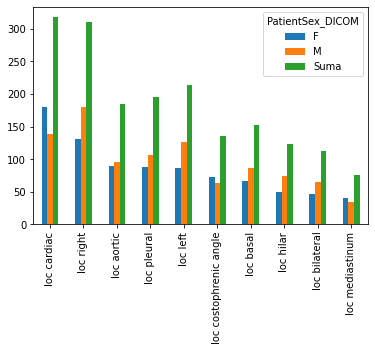

In [58]:
local_piv.iloc[1:11,:].plot(kind ='bar')

### Matplotlib

Python ofrece una gran cantidad de librerias externas (es decir que las puede instalar usando `pip install`) para plotear datos. Dentro de las mas destacads se encuentran [Seaborn](https://seaborn.pydata.org/), [Bokeh](https://docs.bokeh.org/en/latest/index.html), [Plotly](https://plotly.com/), entre otras. Sin embargo, Python ofrece una libreria por defecto llamada `matplotlib` que es muy versatil y siempre es una buena primera opción al momento de hacer nuestros primeros ploteos exploratorios.
Por ejemplo, el gráfico que acabamos de realizar fue hecho tambien con `matplotlib`, Pandas lo usa por defecto en su función `plot()`.

Exploremos un poco esta libreria:

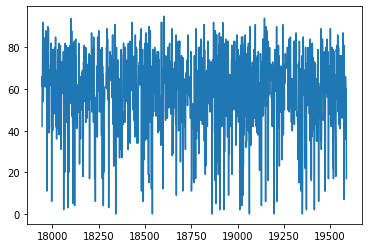

In [66]:
import matplotlib.pyplot as plt # importamos la libreria
# plot es la funcion mas sencilla de usar, es super general y usualmente no necesitamos definir los ejex x e y, sencillamente los interpreta segun el orden que le asignemo. Por ejemplo:
plt.plot(df_small.Edad)

Pasan varias cosas aquí. Primero observamos una leyenda que dice `[<matplotlib.lines.Line2D at ...>]`. Por qué sucede esto? Porque por defecto `plot()` produce un objeto gráfico.
El usuario una gran capacidad para customizar estos gráficos y agregar detalles. Es aquí donde tanta flexibilidad puede volverse medio incomodo, ya que debemos recordar el nombre de todos los diferentes argumentos que queremos modificar. Una lista de estos puede consultarse [aquí](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) y [aquí](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=matplotlib%20pyplot%20plot#matplotlib.pyplot.plot).

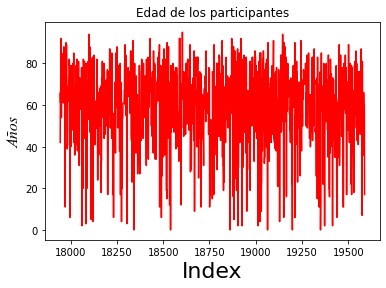

In [71]:
plt.plot(df_small.Edad, color = 'red')
plt.xlabel("Index", size = 22) # Cambiemos los labels de los ejes
plt.ylabel('Años', font='Times New Roman', style='italic', size=16)
plt.title('Edad de los participantes') # agregeumosle un titulo a la figura
plt.show() # Evita que se imprima el último comando que se le paso al kernel, y simplemente plotea el objeto

Si bien `plot()` nos permitió muy facilmente generar un gráfico, quizas el tipo de grafico generado no es el más indicado. Al no aportarte dos ejes (x,y), la funcion asigna los `index` de nuestra Serie como el eje X y los valores como el eje Y. Ademas, esta variable no sigue una dinámica temporal, sino mas bien de frequencia.

### Histograma
En estadística, un histograma es una representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Link a la [documentación](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) de matplotlib

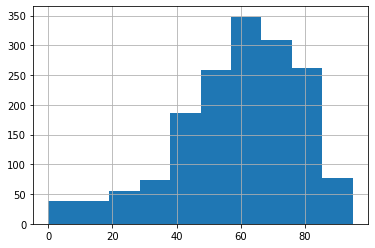

In [229]:
x = df_small['Edad'].hist()

Si bien Pandas nos va a permitir realizar ciertos gráficos sobre nuestras columnas, vamos a ver como podemos hacer todo esto directamente usando `matplotlib`. Esto nos va a permitir mucha flexibilidad. A su vez, no siempre vamos a plotear datos provenientes de un dataframe por lo cual es importante aprender como hacer esto.

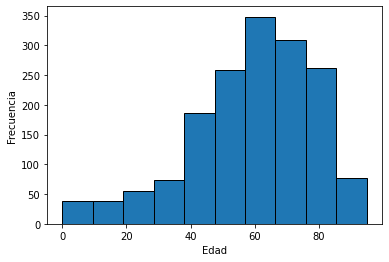

In [63]:
plt.hist(df_small.Edad, edgecolor = 'black')
plt.xlabel('Edad'), plt.ylabel('Frecuencia')
plt.show()

`matplotlib` nos va a permitir plotear diferentes datos en un mismo par de ejes x,y. Para esto creamos un par de ejes iniciales, en este caso lo haremos directamente con la función `plot.hist()`. Luego plotearemos un nuevo grafico con nueva información sobre etos mismos ejes.
Vamos a hacer dos histogramas, uno con los distribución de edad para Fumadores y otro para no Fumadores.

(array([ 19.,  18.,  27.,  35.,  78., 110., 144., 159., 121.,  65.]),
 array([ 0. ,  9.2, 18.4, 27.6, 36.8, 46. , 55.2, 64.4, 73.6, 82.8, 92. ]),
 <BarContainer object of 10 artists>)

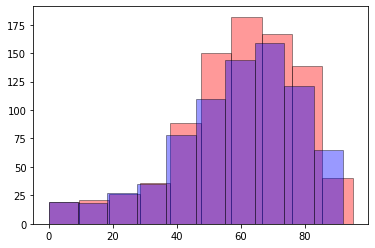

In [64]:
#Mujeres
plt.hist(df_small[df_small.PatientSex_DICOM == 'F'].Edad, 
         color = 'red',
         edgecolor = 'k',
         #histtype='step',
         label= 'Mujeres',
         alpha = 0.4
        )
#Hombres
plt.hist(df_small[df_small.PatientSex_DICOM == 'M'].Edad,
         color = 'blue',
         edgecolor = 'k',
         #histtype='step',
         label= 'Hombres',
         alpha = 0.4,
        )

Vemos que ambos gráficos comparten los mismos ejes. Sin embargo, vemos que en este caso los 'bins' difieren en su localización lo cual vuelven la comparación un poco más difícil.
A su vez vemos que la función `plot.hist()` devielve tres elementos antes de devolver el objeto gráfico. Estos son la frecuencia para cada bin, las coordenadas en el eje X de los bins, y los poligonos o barras.

In [72]:
#help(plt.hist)

Resolvamos estos inconvenientes: 

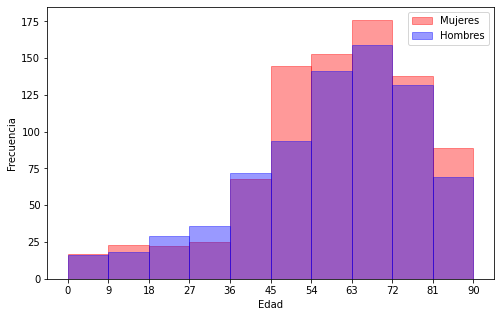

In [70]:
plt.figure(figsize=(8,5)) # creamos una figura, la vamos a hacer mas grande.
valores, ticks , polygon = plt.hist(df_small[df_small.PatientSex_DICOM == 'F'].Edad, 
                                     range= (0,90), # Seteamos el rango de datos que vamos a mostrar
                                     bins = 10,  # Seteamos la cantidad de bins
                                     edgecolor = 'red',
                                     color = 'red',
                                     label= 'Mujeres',
                                     alpha = 0.4
                                    )
plt.hist(df_small[df_small.PatientSex_DICOM == 'M'].Edad,
         range= (0,90),
         bins = 10,
         edgecolor = 'blue',
         color = 'blue',
         #histtype='step',
         label= 'Hombres',
         alpha = 0.4,
        )

plt.xlabel('Edad'), plt.ylabel('Frecuencia') # Nombramos nuestros ejes
plt.xticks(ticks=ticks) # seteamos que los ticks sean los del primer grafico
plt.legend()
plt.show()

In [547]:
df_small.groupby('PatientSex_DICOM').agg('mean')['Edad']

PatientSex_DICOM
F    59.355581
M    58.596649
Name: Edad, dtype: float64

### Scatterplot
Para comparar multiples distribuciones  puede resultarnos más cómodo utilizar un `scatter plot`.  Un scatter plot o gráfico de dispersión es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos.

Observamos anteriormente que la cantidad de proyecciones no se encuentran igualmente distribuidas entre las distintas categorías. Quizas nos importa saber si a pesar de esto la distribución de edad es similar para todas las proyecciones.

In [91]:
# Corramos un grupby rapido para saber la media de edad según la proyección empleada
df_small.groupby('Projection')['Edad'].agg(['mean','std'])

,mean,std
Projection,,
AP,47.928571,36.680733
AP_horizontal,58.093333,23.414695
L,58.936416,19.198863
PA,59.397849,18.192520


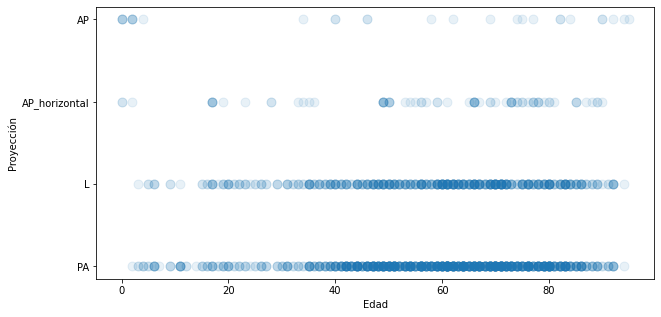

In [540]:
plt.figure(figsize=(10,5))
plt.scatter(df_small.Edad,df_small.Projection, alpha = 0.1, s=80)
plt.xlabel('Edad'), plt.ylabel('Proyección')
plt.show()

Podemos observar que las distribuciones no son similares. Los casos se encuentran mucho mas concentrados alrededor de la media de edad para las proyecciones L y PA. Esto podrias ser un elemento a tener en cuenta en el futuro al momento de entrenar un modelo de Machine Learning.

Otra variable que puede ser de nuestro interes es si la cantidad de lesiones aumenta con la edad. Una opcion podría ser crear grupos por rango de edad y comparar. Pero no nos adelantemos, probemos con el abordaje más sencillo primero

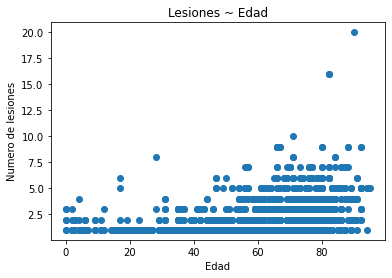

In [543]:
# Numero de lesiones
df_small.Labels2.apply(lambda x: len(x)) # Cuenta la cantidad de elementos en la celda de lesiones (labels2) para cada sujeto.
plt.scatter(df_small.Edad, df_small.Labels2.apply(lambda x: len(x)))
plt.title('Lesiones ~ Edad')
plt.xlabel('Edad'), plt.ylabel('Numero de lesiones')
plt.show()

### Boxplot

Los diagramas de Caja-Bigotes (boxplots o box and whiskers) son una presentación visual que describe varias características importantes, al mismo tiempo, tales como la dispersión y simetría.<br>
Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente.<br>
Link a la [documentación](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.boxplot.html) de matplotlib


{'whiskers': [<matplotlib.lines.Line2D at 0x1cc1b6f8fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cc19f77108>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cc1b6f3708>],
 'medians': [<matplotlib.lines.Line2D at 0x1cc1b6fef48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cc1b702ec8>],
 'means': []}

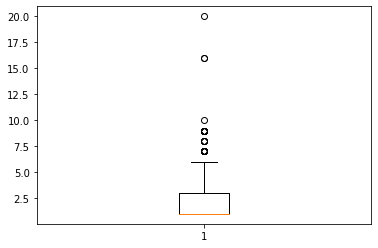

In [215]:
plt.boxplot(x = df_small.Labels2.apply(lambda x: len(x)))

In [ ]:
#help(plt.boxplot)

Vemos que la funcion `plt.boxplot` arroja como output un diccionario, en donde cada key corresponde a un elemento del gráfico. Vamos a utilizar este diccionario para modificar ciertas propiedades del grafico.

In [2]:
# plt.figure(figsize=(10,5))
dic = plt.boxplot(x = [
                      df[df.smoker == 1],
                      df[df.smoker == 0]
                      ],
                  meanline=True,
                  showmeans=True,
                  widths=[0.7,0.7],
                  labels=['Fumador','No Fumador']
                 )
[i.set_linewidth(0.3) for i in dic['boxes']] # Esto es una lista por comprension! 
#Si te cuesta entender que esta haciendo pensalo asi:
    # Para cada elemento en dic['boxes'] va a aplicar el metodo .set_linewidth (dado que YA SE que ambos seran objetos con este metodo)
dic['medians'][0].set_label('Mediana') # Como ambos objetos tienen media y mediana le colocare nombre a uno solo y luego ploteare la leyenda
dic['means'][0].set_label('Media')

plt.legend()
plt.show()

NameError: name 'plt' is not defined

Algunas conclusiones, los hombres parecerían reportar (al menos en nuestro subset) mayor cantidad de lesiones que las mujeres, a pesar de que observamos que la media de edad de las mujeres es ligeramente mayor que los hombres. Si consideramos que la edad es un indicador de mayor probabilidad de observar mas lesiones, estos datos nos permiten empezar a pensar que el sexo de los sujetos puede ser un factor a tener en cuenta.

### Subplots

`matplotlib` nos permite crear plots que contengan plots mas pequeños dentro, o mejor dicho subplots. 

(<Figure size 432x288 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

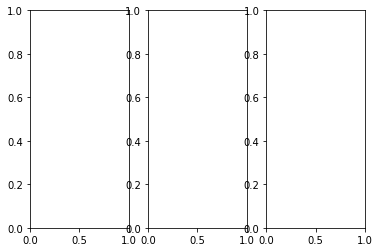

In [553]:
plt.subplots(nrows=1,ncols=3)

Vemos que el output de `subplots` es una tupla con dos elementos una Figura y un array con Ejes (Axes). [Documentación](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)<br>
A modo breve, podemos decir que la Figura es el "marco" y los ejes los "elementos" de nuestro cuadro o imagen. 
Cada elemento tendra sus propios `atributos` y `metodos`. 
Sobre los ejes plotearemos nuestros gráficos individuales, en cada eje plotearemos un grafico puntual, epero como ya vimos tambien podemos superponer los graficos.<br> Usaremos la Figura solamente para modificar aspectos estéticos de la imagen como tal.

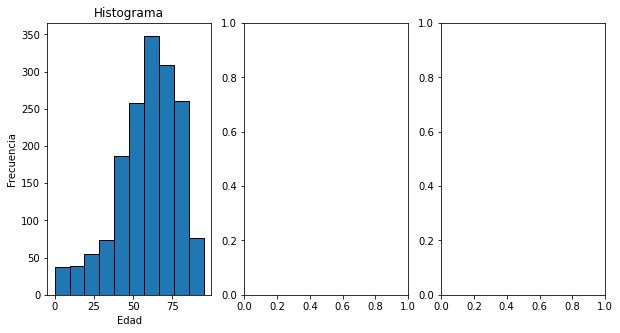

In [572]:
fig, axs = plt.subplots(nrows=1,ncols=3)
axs[0].hist(df_small.Edad, edgecolor = 'black') # Ploteo nuestro histograma en el primer eje
axs[0].set_title('Histograma') # Tambien puedo setear los mismo elementos que con un solo plot
axs[0].set_xlabel('Edad'), axs[0].set_ylabel('Frecuencia')
fig.set_size_inches(10,5) # cambio el tamaño de TODA la figura
plt.show()

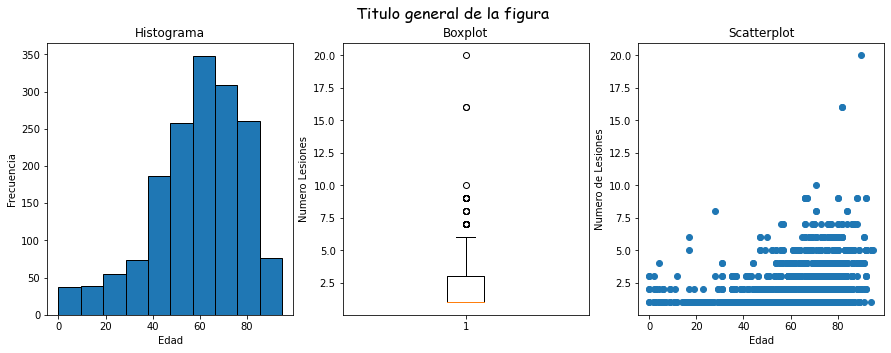

In [589]:
fig, axs = plt.subplots(nrows=1,ncols=3)
# Eje 1
axs[0].hist(df_small.Edad, edgecolor = 'black')
axs[0].set_title('Histograma')
axs[0].set_xlabel('Edad'), axs[0].set_ylabel('Frecuencia')
# Eje 2
axs[1].boxplot(x = df_small.Labels2.apply(lambda x: len(x)))
axs[1].set_title('Boxplot')
axs[1].set_ylabel('Numero Lesiones')
# Eje 3
axs[2].scatter(df_small.Edad, df_small.Labels2.apply(lambda x: len(x)))
axs[2].set_title('Scatterplot')
axs[2].set_xlabel('Edad'), axs[2].set_ylabel('Numero de Lesiones')

# Opciones de la figura
fig.set_size_inches(15,5)
fig.suptitle('Titulo general de la figura', font = 'Comic Sans MS', size = 16)
plt.show()

### Barplot

Un diagrama de barras, también conocido como gráfico de barras o gráfico de columnas, es una forma de representar gráficamente un conjunto de datos o valores mediante barras rectangulares de longitud proporcional a los valores representados. Los gráficos de barras pueden ser usados para comparar cantidades de una variable en diferentes momentos o diferentes variables para el mismo momento. Las barras pueden orientarse horizontal y verticalmente.

Si bien `matplotlib` ofrece la posibilidad de generar estos gráficos, considero mas recomendable usar `Seaborn`. Esta librería nos ofrece funcionalidades muy buenas para poder hacer plots segmentando nuestras variables principales (x,y) por alguna variable secundaria mediante la opción `hue`.
[Seaborn (Documentación)](https://seaborn.pydata.org/)

In [2]:
import seaborn as sbn # Importo la librería

sbn.barplot(data = df_small,
            x='PatientSex_DICOM',
            y= df_small.Labels2.apply(lambda x: len(x)),
            ci = 95
           )

NameError: name 'df_small' is not defined

Vemos que el output es un Axes. Como vimos anteriormente esto nos permite asignar este Eje a una variable y modificar las propiedades del plot directamente sobre este con los metodos que empiezan con `ax.set_...`

In [102]:
#Calculemos una categoria de edad.
#Definamos una función para pasarla a nuestra función `apply`
def grupoEtario(valor):
    if valor > 65:
        return 'Jubilado'
    elif valor > 18:
        return 'Adulto'
    else:
        return 'Niño'
    
df_small.Edad.apply(grupoEtario)

17944      Adulto
17945    Jubilado
17946      Adulto
17947    Jubilado
17948    Jubilado
           ...   
19584      Adulto
19585      Adulto
19586      Adulto
19587      Adulto
19588        Niño
Name: Edad, Length: 1645, dtype: object

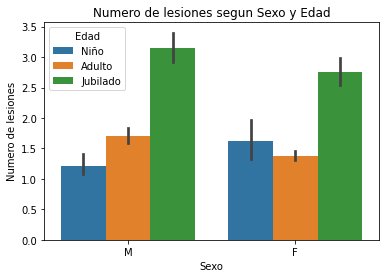

In [256]:
ax = sbn.barplot(data = df_small,
            x='PatientSex_DICOM',
            y= df_small.Labels2.apply(lambda x: len(x)),
            ci = 95,
            hue= df_small.Edad.apply(grupoEtario),
            hue_order=['Niño','Adulto','Jubilado']
           )
ax.set_ylabel('Numero de lesiones')
ax.set_xlabel('Sexo')
ax.set_title('Numero de lesiones segun Sexo y Edad')
plt.show()

### Utilizando Seaborn para graficar relaciones condicionales

In [ ]:
# Vamos a guardar nuestras variables transformadas en nuestro dataset para que el codigo sea mas limpio.
df_small['Grupo_etario'] = df_small.Edad.apply(grupoEtario)
df_small['Numero_lesiones'] = df_small.Labels2.apply(lambda x: len(x))

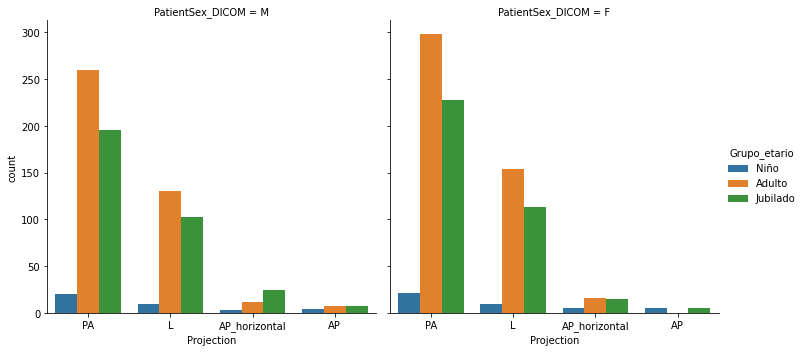

In [326]:
ax = sbn.catplot(x="Projection",
                 hue="Grupo_etario",
                 hue_order= ['Niño','Adulto','Jubilado'],
                 col="PatientSex_DICOM",
                 data=df_small,
                 kind="count")

`FacetGrid()` es muy similar a utilizar subplots, pero nos permite utilizar una logica similar a la que usamos con el ejemplo anterior

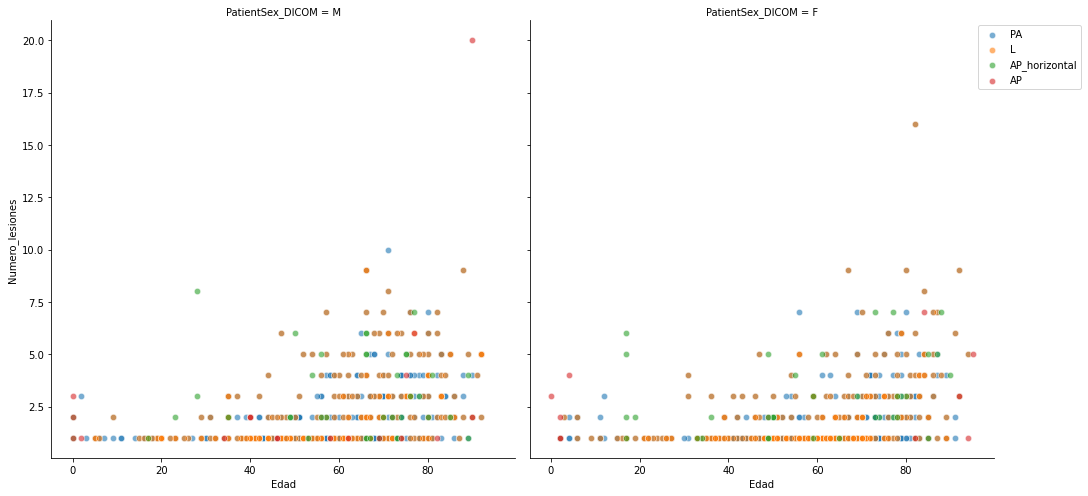

In [550]:
bysex = sbn.FacetGrid(df_small, col= "PatientSex_DICOM",
                      hue = "Projection", #segmentar por esta variable,
                      size = 7 # Permite seleccionar el size del grafico
                     )
bysex.map(sbn.scatterplot, 'Edad', 'Numero_lesiones', alpha = 0.6, s=40)
plt.legend(bbox_to_anchor = (1.2,1))
plt.show()

Este plot no nos dice mucho a simple vista. Lo cree principalmente para mostrar como `FacetGrid()` nos da una mano para graficar.
Desafortunadamente nuestro dataset no tiene demasiadas variables cuantitativas que podamos explorar para ver relaciones entre variables. Si el lector lo desea puede ver más ejemplos en las siguientes secciones.

## 3. Ejemplo extra de EDA
Vamos a descargar un dataset publico de la pagina de `datos.salud` de la Republica Argentina.<br>
El dataset es un listado de recetas de medicamentos esenciales por provincia

In [207]:
import pandas as pd  # Importamos la libreria
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
# Setea la opcion de cuantos decimales plotear. No es necesario definirlo, solo lo hago por comodidad

url_data = "http://datos.salud.gob.ar/dataset/dff3bf69-3514-42a3-a2aa-041495895ab2/resource/7fe68644-7411-4080-be29-ec5bb94dc635/download/recetas-medicamentos-esenciales.csv"
df = pd.read_csv(url_data) #Pandas automaticamente accede a la url y descarga el dataframe en memoria. Increible!!!

In [208]:
df

,provincia_id,provincia_desc,año,recetas_confeccionadas_cantidad
0,2,Ciudad Autonoma de Buenos Aires,año_2003,167578
1,6,Buenos Aires,año_2003,3123038
2,10,Catamarca,año_2003,149120
3,14,Cordoba,año_2003,977247
4,18,Corrientes,año_2003,352165
...,...,...,...,...
355,78,Santa Cruz,año_2017,49205
356,82,Santa Fe,año_2017,1249618
357,86,Santiago del Estero,año_2017,950687
358,90,Tucuman,año_2017,1225501


**Bienvenido al 80% del tiempo empleado en cualquier analisis...limpiar datos.**<br>
Como veras el campo año es bastante feo, modifiquemoslo.

Para eso usaremos la funcion `replace` la cual es una función propia del tipo de dato `Series`. 

A su vez, deberemos usar expresiones regulares o mas popularmente llamadas regex. Las expresiones regulares son una herramienta muy util para el  procesamiento de texto, pero no vamos a cubrirlas en este curso. Puedes aprender como usarlas y practicar en esta [página](https://regexr.com/)

In [209]:
df.año.replace('año_*', '', regex = True) 

0      2003
1      2003
2      2003
3      2003
4      2003
       ... 
355    2017
356    2017
357    2017
358    2017
359    2017
Name: año, Length: 360, dtype: object

In [210]:
df.año.replace('año_*', '', regex = True, inplace= True)  
# Vamos a usar la variable `inplace` para modficar la columna en nuestro dataset 

In [211]:
df.dtypes

provincia_id                        int64
provincia_desc                     object
año                                object
recetas_confeccionadas_cantidad     int64
dtype: object

In [212]:
# Vemos que año no es un integer sino una string. Podriamos modificar esto con el siguiente comando
df.año = df.año.astype(int)
df.dtypes

provincia_id                        int64
provincia_desc                     object
año                                 int32
recetas_confeccionadas_cantidad     int64
dtype: object

In [213]:
# Vemos que tenemos varios años, estaria bueno saber cuantos años distinto tenemos.
df.año.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017], dtype=int64)

In [214]:
# Deberiamos contar cuantas provincias tenemos, solo para estar seguros que todo esta en orden
df.provincia_desc.nunique()  # nunique() me dice el N de unicos casos en mi columna

24

Podemos obtener algunos estadisticos descriptivos rapidos usando la funcion `describe`

In [215]:
df.describe()

,provincia_id,año,recetas_confeccionadas_cantidad
count,360.00,360.00,360.00
mean,48.00,2010.00,672977.19
std,27.73,4.33,767384.93
min,2.00,2003.00,8099.00
25%,25.00,2006.00,201983.25
50%,48.00,2010.00,475719.50
75%,71.00,2014.00,818982.00
max,94.00,2017.00,4217160.00


Vemos que la opcion `describe()` por defecto no toma variables de tipo `Object` o `string`. 

Vemos que para la variable `recetas_confeccionadas_cantidad` el desvio standard (`std`) es mayor a la media. Esto nos da la pauta de que la distribucion no es normal.

Apliquemos algo de lo que aprendimos acerca de las tablas pivot. Estas a veces pueden ser utiles para `printear` los datos de una manera más intuitiva.

In [231]:
df.pivot_table(index='provincia_desc',
               columns = 'año',
               values='recetas_confeccionadas_cantidad'
              )

año,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
provincia_desc,,,,,,,,,,,,,,,
Buenos Aires,3123038,3916997,3899943,4139859,3779001,2932939,3300817,3717661,3784732,4217160,4061801,4082578,4090324,3761718,3730091
Catamarca,149120,268093,278804,304047,321621,251638,291937,339405,347491,398695,425996,488126,478093,408245,430448
Chaco,551906,842489,832674,913629,861813,776369,932141,1075859,1048549,1036246,1041089,1055850,1129330,1046066,1043477
Chubut,113193,153779,157571,189124,188409,173643,210812,252109,241036,249670,260098,243841,235316,230398,227164
Ciudad Autonoma de Buenos Aires,167578,214006,218813,226738,210232,206121,196429,198120,193631,205732,192521,180806,168615,164264,172628
Cordoba,977247,1470119,1441383,1534470,1461669,1197232,1334520,1534511,1537610,1626284,1688409,1713857,1760988,1506135,1576309
Corrientes,352165,534945,619386,660748,680236,571090,649784,784755,779029,828853,816393,849594,874604,821064,827584
Entre Rios,477469,735472,682877,743906,699162,571394,630037,775335,795493,814292,829542,818288,838640,755752,775809
Formosa,244323,350553,431918,487998,473970,383650,444023,520811,503810,536349,514674,565384,550101,473064,491679


Si bien la información esta un poco más ordenada, resulta difícil procesar tanta información. Vamos a graficarla para ver que podemos observar

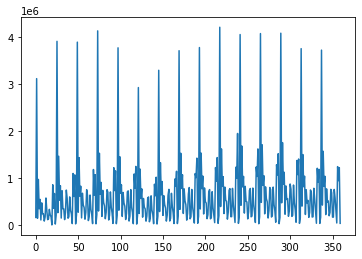

In [216]:
import matplotlib.pyplot as plt  # Importamos la libreria
plt.plot(df.recetas_confeccionadas_cantidad) # Vamos a usar un comando super simple para tener una rapida idea.

Evidentemente tenemos diferencias notables dependiendo de algun factor. Dado que sabemos algo de nuestro dataset podemos pensar que esta diferencia se debe a las provincias, al año o a una interaccion entre ambas.

Nos gustaria entonces observar como se comportan nuestros datos "agrupando" nuestros datos alrededor una variable. Calculaemos rapidamente algunos estadististicos  descriptivos para cada provincia. Para eso usaremos la funcion `groupby`.

In [232]:
df.groupby(by='provincia_desc')['recetas_confeccionadas_cantidad'].aggregate('describe')
# Solo me interesan los datos agrupado de las recetas confeccionadas.
# Si queres, podes probar que pasar si borras la seleccion (borra: ['recetas_confeccionadas_cantidad'])

,count,mean,std,min,25%,50%,75%,max
provincia_desc,,,,,,,,
Buenos Aires,15.00,3769243.93,378413.52,2932939.00,3723876.00,3784732.00,4072189.50,4217160.00
Catamarca,15.00,345450.60,93120.31,149120.00,285370.50,339405.00,417120.50,488126.00
Chaco,15.00,945832.47,152532.63,551906.00,852151.00,1036246.00,1047307.50,1129330.00
Chubut,15.00,208410.87,43739.90,113193.00,181026.00,227164.00,242438.50,260098.00
Ciudad Autonoma de Buenos Aires,15.00,194415.60,19849.32,164264.00,176717.00,196429.00,208176.50,226738.00
Cordoba,15.00,1490716.20,202092.20,977247.00,1451526.00,1534470.00,1601296.50,1760988.00
Corrientes,15.00,710015.33,146793.25,352165.00,634585.00,779029.00,824324.00,874604.00
Entre Rios,15.00,729564.53,102827.80,477469.00,691019.50,755752.00,804892.50,838640.00
Formosa,15.00,464820.47,84866.62,244323.00,437970.50,487998.00,517742.50,565384.00


In [233]:
# Ordenemos las filas segun el mayor promedio de recetas confeccionadas
df.groupby('provincia_desc')['recetas_confeccionadas_cantidad'].aggregate('describe').sort_values(by='mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
provincia_desc,,,,,,,,
Buenos Aires,15.00,3769243.93,378413.52,2932939.00,3723876.00,3784732.00,4072189.50,4217160.00
Cordoba,15.00,1490716.20,202092.20,977247.00,1451526.00,1534470.00,1601296.50,1760988.00
Tucuman,15.00,1281695.07,299750.15,677249.00,1113873.00,1225501.00,1436187.50,1955475.00
Santa Fe,15.00,1152043.73,148623.60,863259.00,1097211.00,1214518.00,1239914.50,1379683.00
Chaco,15.00,945832.47,152532.63,551906.00,852151.00,1036246.00,1047307.50,1129330.00
Santiago del Estero,15.00,840951.93,209068.45,361786.00,690589.50,915134.00,1008027.50,1079910.00
Entre Rios,15.00,729564.53,102827.80,477469.00,691019.50,755752.00,804892.50,838640.00
Mendoza,15.00,723247.53,79520.68,581158.00,687731.00,745837.00,758431.00,879381.00
Corrientes,15.00,710015.33,146793.25,352165.00,634585.00,779029.00,824324.00,874604.00


Como insight rapido, podemos observar que Buenos Aires es la provincia con mayor cantidad de recetas confeccionadas. 

Si bien sabemos que BS AS es la provincia con mayor poblacion al menos sabemos que nuestros datos son coherentes. Mas sin embargo, observamos que Tucuman aparece inusualmente arriba comparado con su poblacion. Indagaremos acerca de esto mas adelante.

**Observemos qué pasa en la dimensión temporal**<br>
Las recetas confeccionadas aumentaron o disminuyeron a lo largo del tiempo? 

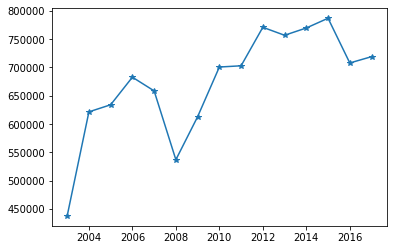

In [287]:
 # Primero empezaremos con el promedio Nacional. Para eso agruparemos nuestros valores por año y observaremos la media
plt.plot(df.groupby('año')['recetas_confeccionadas_cantidad'].aggregate('mean'),marker = '*')

El gráfico nos muestra que la cantidad de recetas confeccionadas aumentaron desde el 2003 al 2017. 

Se puede observar un aumento sostenido durante el periodo 2003-2015 y una reduccion hacia el periodo 2016-2017. 

Es interesante el brusco descenso en el año 2008. Sin contexto es dificil explicar este decrecimiento. Podría deberse a la crisis económica del 2008, a la aplicacion de una politica publica, etc. 

In [ ]:
# Si quisieramos podriamos observar caso por caso
df.loc[df['provincia_desc'] == 'Buenos Aires'] # Pandas nos permite filtrar una provincia especifica 

Ir caso por caso nos llevaria mucho tiempo y es realmente dificil retener toda la información en nuestra mente. 

Vamos a usar nuestro conocimiento de bucles y vamos a plotear una linea para cada provincia y otra linea mostrando los valores para la media por año. Esto nos dara mayor informacion sobre nuetros datos.

In [ ]:
for provincia in df.provincia_desc.unique():
    plt.plot(df.loc[df['provincia_desc'] == provincia]['año'],
             df.loc[df['provincia_desc'] == provincia]['recetas_confeccionadas_cantidad'])
    
plt.plot(df.groupby('año')['recetas_confeccionadas_cantidad'].aggregate('mean'),marker = '*', label = 'Promedio')
plt.legend(loc = 'upper right')

Evidentemente tenemos una gran diferencia producto de la cantidad de poblacion de cada provincia. 

Si quisieramos evaluar si alguna provincia tiene un mayor o menos consumo que el promedio (y por ende quizas un escenario util para aplicar alguna politica publica) debemos normalizar nuestra variable de intereses en concordancia con la poblacion de cada provincia.

Para hacer eso debemos saber cuanta gente hay en cada provincia. A continuacion veremos: 

- Como Pandas puede leer archivos de excel
- Como indexar las filas y columnas que queremos
- Como aplicar funciones a nuestro dataframe
- Como realizar un merge/join con dos datasets

**Empecemos!**

In [ ]:
# Vamos a descargar un dataset con informacion de la cantidad de poblacion por provincia
url_poblacion = "https://www.indec.gob.ar/ftp/censos/2010/CuadrosDefinitivos/Total_pais/P1-P_Total_pais.xls"

In [ ]:
poblacion = pd.read_excel(url_poblacion) # Pandas puede leer multiples formatos

In [ ]:
poblacion.head(10)

Observamos que el dataset presenta un formato confuso. Vamos a ordenarlo para poder continuar trabajando.

In [ ]:
pob_clean = poblacion.iloc[5:33,:3].copy() # seleccciono las filas desde la 5 a  la 33 y desde la primer columna hasta la tercera 

In [ ]:
pob_clean.columns = ['Provincia','2001','2010'] # Le asigno nuevos nombres a mis columnas

In [ ]:
pob_clean.dropna(inplace=True) # Elimino las filas con valores nulos ( ej fila 6)

In [ ]:
import unidecode # vamos a importar una libreria que nos permitira quitar las tildes de nuestra columna 'PROVINCIA'

 CoLab no viene por defecto con esta libreria instalada. Eso no es un problema, lo que demos hacer entonces es intalar una libreria. <br>
Para eso usaremos el signo de exclamacion (!). Como ya vimos, este signo permite introducir un comando de bash (shell) para que se descargue e instale esta libreria. 

In [ ]:
!pip install unidecode

In [ ]:
import unidecode #Importamos nuestra nueva libreria
pob_clean.Provincia.apply(lambda x: unidecode.unidecode(x)) 

Recuerdas las funciones `lambda` que mencionamos antes? Aquí estan devuelta

In [ ]:
# Ejemplo usando una funcion previemente definida.

def quitar_tildes(provincia_con_tilde):
    return unidecode.unidecode(provincia_con_tilde)
# Usamos nuestra funcion dentro de la funcion apply    
pob_clean.Provincia.apply(quitar_tildes) 


In [ ]:
pob_clean['Provincia'] = pob_clean.Provincia.apply(quitar_tildes).copy()  # Vamos a pisar nuestros valores viejos, por los valores sin tilde.

In [ ]:
pob_clean.head(5)

**Genial!** ya tenemos nuestra nueva tabla limpia y pandas-friendly. Ahora debemos ver como unir esta información con nuestros datos originales. 

Usaremos una función por defecto incluida en los DataFrames llamada `merge`.  Si querés más información acerca de las diferentes formas de usar Pandas para unir o "joinear" datos podes consultar [aqui](https://www.analyticslane.com/2018/09/10/unir-y-combinar-dataframes-con-pandas-en-python/)

In [ ]:
df.merge(pob_clean, how='left', left_on='provincia_desc', right_on='Provincia') # mergearemos usando el nombre de provincia
# En proyectos mas grandes, se recomienda no depender de variables dificiles de normalizar como nombres propios,
# sino usar una codificación estandarizada.

Casi perfecto... Veamos qué paso en esta última fila.

In [ ]:
df.provincia_desc.iloc[-1] # Vemos que nuestro Dataframe original era inconsistente. 
# Es decir no tenia tildes para el resto de las provincias pero si para la palabra Antártida. Modifiquemos esto con nuestra función

In [ ]:
df.provincia_desc = df.provincia_desc.apply(quitar_tildes)
df.merge(pob_clean, how='left', left_on='provincia_desc', right_on='Provincia')

In [ ]:
# Parece que todo funcionó. Vamos a asegurarnos
df_completo = df.merge(pob_clean, how='left', left_on='provincia_desc', right_on='Provincia')
df_completo.isna().sum() # Va a asignar un boolean (True) a cada missing value en una columna,
                         # luego suma todos los booleans como si fueran unos (1) en una columnda

Ahora vamos a generar una nueva columna con la razón de recetas recetadas por poblacion para cada provincina.

 Para eso aprovecharamos que Pandas nos permite realizar operacion con vectores o arrays en vez de ir valor por valor haciendo la misma operacion.

Vamos a obviar por un momento que la cantidad de personas aumentó desde el censo del 2000 al 2010. Dado que nuestros datos van del periodo 2003 al 2017 usaremos solamente el valor de la cantidad de habitantes por provincia del censo del 2010. 

*Si quisieramos ser mas finos, podriamos crear una función que aggregue un estimativo del incremento de poblacion de un año para el siguiente pero eso escapa un poco el objetivo de este taller.*

In [ ]:
df_completo['razon_recetas_poblacion'] = df_completo['recetas_confeccionadas_cantidad']/ df_completo['2010'] 
# Pandas me permiter dividir cada valor en una fila de una columna por otro valor en la misma fila de una columna diferente
df_completo

In [ ]:
#Ploteemos nuevamente estos valores
# Usemos nuestro dominió de los loops

for provincia in df.provincia_desc.unique():
    plt.plot(df_completo.loc[df_completo['provincia_desc'] == provincia]['año'],
             df_completo.loc[df_completo['provincia_desc'] == provincia]['razon_recetas_poblacion'])

plt.show()

**Espectacular!!** 

Resolvimos un problema, sin embargo aun hay mucha información en nuestro gráfico. Vamos a enfocarnos unicamente en las provincias en las cuales se recetan mas recetas que el número de habitantes.

In [ ]:
df_completo[df_completo['razon_recetas_poblacion'] > 1].sort_values(by='razon_recetas_poblacion', ascending = False)
# Si bien esta linea parece compleja podemos dividirla en dos partes, antes del 'sort_values' y posterior.
# La primera es muy similar a lo que hicimos cuando filtrabamos por provincia salvo que en este caso filtramos las filas que tengan un 
# valor mayor a 1 para la columna 'razon_recetas_poblacion'. 
# La segunda parte es una funcion por defecto de nuestro DataFrame.

Esto es información más manejable, y quizas más útil para nuestros intereses. 
Veamos cuales son estas provincias.

In [ ]:
provs_alto_valor = df_completo[df_completo['razon_recetas_poblacion'] > 1]
provs_alto_valor['provincia_desc'].unique()

In [ ]:
# Ploteemos nuevamente un gráfico con este subset
for prov in provs_alto_valor['provincia_desc'].unique():
    plt.plot(df_completo.loc[df_completo['provincia_desc'] == prov]['año'],
             df_completo.loc[df_completo['provincia_desc'] == prov]['razon_recetas_poblacion'],
             label = prov,
             marker = 'o',
             markersize = 3)

# matplotlib me permite configurar todos los elementos por separado si asi lo deseara 
plt.hlines(1, xmin = 2003, xmax = 2017, linestyle='--') # Vamos a crear una lina horizontal que marque el valor 1
plt.legend(bbox_to_anchor=(1.05, 1)) # Elegimos plotear la leyenda fuera del grafico, en este caso el primer valor es en el eje X, el segundo Y)
plt.xlabel('Año')
plt.ylabel('Razon (numero de recetas/poblacion)')
plt.title('Provincias con una razon > 1')
plt.show()

## 4. Introducción a la estadística inferencial

A continuacion vamos a elegir un nuevo dataset e indagaremos como podemos usar las técnicas aprendidas para aplicar técnicas estadisticas descriptivas e inferenciales. Esto nos va a permitir realizar EDA mas complejos y obtener mucha mas información para entender el problema que tenemos enfrente. 

**Que veremos en esta unidad:**

- [Contraste de hipotesis][Modeling]
- Introduccion a [Statsmodels][Statsmodels]
- Test de normalidad de variables [Shapiro-Wilk][Shapiro-Wilk]
- [QQplots][QQplots]
- Distintos [datasets][Datasets] disponibles

[Modeling]:http://conceptosclaros.com/contraste-hipotesis/
[Statsmodels]:https://www.statsmodels.org/stable/index.html
[Shapiro-Wilk]:https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
[QQplots]:https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/
[Datasets]:https://www.sheffield.ac.uk/mash/statistics/datasets

In [104]:
# Descargamos el dataset
df = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.886038!/file/Birthweight_reduced_R.csv')
# Este dataset tiene informacion acerca de recien nacidos y de sus padres.
df.head(5)  # Mostrame las primeras 5 filas

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [105]:
#Vamos a realizar una rapida exploración del dataset
df.describe()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,13.261905,19.928571,7.264286,39.190476,0.523810,25.547619,9.428571,64.404762,125.857143,28.904762,13.666667,17.190476,70.761905,0.142857,0.095238
std,467.616186,0.766987,1.112958,1.329739,2.643336,0.505487,5.666342,12.511737,2.547687,15.879994,6.863866,2.160247,17.308165,2.843988,0.354169,0.297102
min,27.000000,12.000000,17.000000,4.200000,33.000000,0.000000,18.000000,0.000000,58.000000,99.000000,19.000000,10.000000,0.000000,66.000000,0.000000,0.000000
25%,537.250000,13.000000,19.000000,6.450000,38.000000,0.000000,20.250000,0.000000,63.000000,115.000000,23.000000,12.000000,0.000000,69.000000,0.000000,0.000000
50%,821.000000,13.000000,20.000000,7.250000,39.500000,1.000000,24.000000,4.500000,64.000000,125.000000,29.500000,14.000000,18.500000,71.000000,0.000000,0.000000
75%,1269.500000,14.000000,21.000000,8.000000,41.000000,1.000000,29.000000,15.750000,66.000000,135.000000,32.000000,16.000000,25.000000,72.000000,0.000000,0.000000
max,1764.000000,15.000000,22.000000,10.000000,45.000000,1.000000,41.000000,50.000000,71.000000,170.000000,46.000000,16.000000,50.000000,78.000000,1.000000,1.000000


In [106]:
# Parece que todo esta en orden. Por fin un dataset limpio!!
df.isna().sum()

id                  0
headcirumference    0
length              0
Birthweight         0
Gestation           0
smoker              0
motherage           0
mnocig              0
mheight             0
mppwt               0
fage                0
fedyrs              0
fnocig              0
fheight             0
lowbwt              0
mage35              0
LowBirthWeight      0
dtype: int64

In [107]:
df.dtypes

id                    int64
headcirumference      int64
length                int64
Birthweight         float64
Gestation             int64
smoker                int64
motherage             int64
mnocig                int64
mheight               int64
mppwt                 int64
fage                  int64
fedyrs                int64
fnocig                int64
fheight               int64
lowbwt                int64
mage35                int64
LowBirthWeight       object
dtype: object

En este dataset contamos con varias columnas. Cuando tenemos demasiada información puede ser confuso entender qué está pasando. En esos casos es bueno representar la información gráficamente. Vamos a crear una [matrix de correlacion](https://es.wikipedia.org/wiki/Matriz_de_correlaci%C3%B3n#:~:text=Estas%20variables%20independientes%20o%20explicativas,la%20relaci%C3%B3n%20entre%20cada%20pareja)

### Correlation plot

In [108]:
# Correlacion
# Pandas viene por defecto con una función que calcula la matriz por nosotros --> corr 
df.corr()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
id,1.000000,-0.047861,0.248207,0.106798,0.102714,-0.276182,-0.186426,-0.194625,-0.063307,-0.020488,-0.231958,0.119927,-0.112889,0.073043,-0.128483,-0.266021
headcirumference,-0.047861,1.000000,0.565328,0.736396,0.443975,-0.173751,0.112108,-0.131438,0.381293,0.357594,0.301363,0.083417,-0.027734,0.040466,-0.500247,-0.005097
length,0.248207,0.565328,1.000000,0.697008,0.651403,-0.235349,-0.020719,-0.157138,0.414731,0.304394,0.078907,-0.050723,0.019716,0.187137,-0.592248,0.021075
Birthweight,0.106798,0.736396,0.697008,1.000000,0.706292,-0.308950,0.001040,-0.151228,0.367947,0.389581,0.176790,0.073870,-0.088927,0.024784,-0.651804,-0.108480
Gestation,0.102714,0.443975,0.651403,0.706292,1.000000,-0.094746,0.010778,0.043195,0.230929,0.250516,0.142175,0.130987,-0.113831,0.187867,-0.602935,0.007395
smoker,-0.276182,-0.173751,-0.235349,-0.308950,-0.094746,1.000000,0.212479,0.727218,0.039682,0.012588,0.197501,-0.014891,0.417633,0.105835,0.253012,0.146938
motherage,-0.186426,0.112108,-0.020719,0.001040,0.010778,0.212479,1.000000,0.340294,0.046784,0.277641,0.806584,0.441683,0.090927,-0.203603,-0.076394,0.692664
mnocig,-0.194625,-0.131438,-0.157138,-0.151228,0.043195,0.727218,0.340294,1.000000,0.171942,0.154008,0.248425,0.198526,0.257307,0.008421,0.035384,0.290574
mheight,-0.063307,0.381293,0.414731,0.367947,0.230929,0.039682,0.046784,0.171942,1.000000,0.671247,-0.071664,0.016249,0.049096,0.272824,-0.200801,0.108944
mppwt,-0.020488,0.357594,0.304394,0.389581,0.250516,0.012588,0.277641,0.154008,0.671247,1.000000,0.253401,0.187701,0.050771,0.108320,-0.338879,0.147704


<AxesSubplot:>

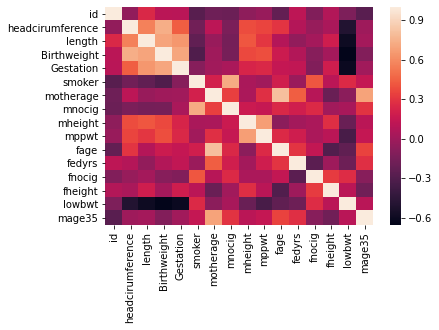

In [109]:
# Vamos a usar seabron para plotear esta matriz
import seaborn as sbn # Libreria para plotear, mas linda que matplotlib y con graficos útiles
sbn.heatmap(df.corr())

 Baia baia, si bien ahora podemos ver toda la información al mismo tiempo, aún no es muy claro.  Vamos a hacer una matriz mas bonita y facil de entender usando numpy y seaborn

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) # vamos a quedarnos solo con el triangulo inferior de la matriz
# np.triu devuelve una matriz triangular, en este caso populada con booleans (True) para el triangulo inferior.

plt.figure(figsize = (10,10)) # creo una figura con un tamañ de 10*10
sbn.heatmap(df.corr(),
            mask=mask, #seaborn viene con la opcion de alimentar a nuestro plot con una mascara
            center=0,  #centramos el valor de correlacion 0 como el punto medio de nuestra barra
            cmap = 'RdBu',
            # Elegimos un mapa de colores mas intuitivo (https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .7})
plt.title('Matriz de correlación')
plt.show()

**Esto se ve mucho mejor!**
Si observamos el grafico automáticamente se observan 3 lineas rojas:

`smoker` : Codifica si la madre fumó o no durante el embarazo (nominal)<br>
`mnocig` : Numero de cigarrillos fumados por la madre por día<br>
`lowbwt` : Bajo peso al nacer (nominal)<br>

Para este curso vamos a concentrarnos en una sola variable para hacer nuestros análisis. Utilizaremos una variable similar a `lowbwt ` pero expresada de una manera cuantitativ: `Birthweight`. Esta variable indica el peso del recien nacido en libras.

Dada nustra matriz de correlación, podemos suponer que el peso de un recien nacido puede estar influenciado por el consumo de tabaco da la madre durante el embarazo.

 *Pequeña aclaración, si bien podemos hacer análisis inferencial sobre estos datos, esto no implica que se realizo un diseño experimental para poder corroborar causalidad entre estas variables.*

In [ ]:
# Importamos librerias que nos seran útiles 
import scipy.stats as stat  # Libreria con diversos test estadísticos
import seaborn as sbn  # Libreria para plotear, mas linda que matplotlib y con graficos útiles

### Histograma

In [ ]:
# Usamos matplotlib para plotear un histograma de nuestras variables de interes.
plt.hist(df.Birthweight, color = 'purple', histtype= 'bar', edgecolor = 'k')
plt.xlabel('Peso al nacer (en libras)')
plt.ylabel('Frecuencia')
plt.show()

### Distribution plot

In [ ]:
# Seaborn nos permite no solo plotear el histograma, sino tambien la distribucion de la variable
sbn.distplot(df.Birthweight,
             bins = 10,
             color = 'purple',
             hist_kws={'edgecolor':'k'})
plt.show()

In [ ]:
peso_fumador = df[df.smoker == 1].Birthweight # vamos a aislar nuestras variables dependiendo si la madre fumó o no durante el embarazo
peso_no_fumador = df[df.smoker == 0].Birthweight

In [ ]:
# Plots
fig, axs = plt.subplots(1,2,figsize = (10,5)) # Dado que tengo dos grupos vamos a plotearlos uno al lado del otro
# plt.subplots() nos va a devolver en este caso una figura y unos ejes, mas precisamente devolverá 2 ejes.
# los dos primeros numeros (1,2) significa 1 fila ,  2 columnas

sbn.distplot(peso_no_fumador,
             bins = 8,
             color = 'green',
             hist_kws={'edgecolor':'k'},
             label = 'No fumador',
             ax=axs[0])
axs[0].legend(bbox_to_anchor=(2.7,1)) # Modifico la ubicacion de la leyenda
axs[0].set_ylabel('Density') # Le pongo un nombre al eje y

sbn.distplot(peso_fumador,
             bins = 8,
             color = 'red',
             hist_kws={'edgecolor':'k'},
             label = 'Fumador',
             ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.45,.9)) # Modifico la ubicacion de la leyenda
plt.suptitle('Distribucion de mis dos variables') # Titulo de toda la figura
plt.show()

### Graficos de cajas y bigotes ('Boxplot')

In [ ]:
fig = plt.boxplot([peso_no_fumador,peso_fumador],
            labels=['No fumador', 'Fumador'],
            patch_artist=True)

fig['boxes'][0].set(facecolor = 'green')
fig['boxes'][1].set(facecolor = 'red')
plt.ylabel('Peso al nacer (libras)')
plt.show()

In [ ]:
# Podemos usar Seaborn en lugar de lib. Observe las diferencias entre una libreria y otra
ax = sbn.boxplot(data = df, y = 'Birthweight', x = 'smoker',  hue='smoker', palette={0:'green', 1:'red'})
ax.set_xticklabels(['No fumador','Fumador'])
plt.show()

In [ ]:
# Usamos matplotlib para plotear un histograma de la distribucion de fumadores / no fumadores
plt.hist(df.smoker, color = 'orange', histtype= 'bar', edgecolor = 'k', bins = 3)
plt.ylabel('Frecuencia')
plt.xticks([0.15,0.85],labels = ['No Fumador','Fumador'])
plt.show()

A primera vista hay una diferencia en el peso al nacer y el hecho de fumar o no. El primer paso antes de realizar cualquier tipo de test estadístico es corroborar los supuestos de los test que queremos emplear. En este caso, usaremos test paramétricos los cuales tienen diversos supuestos, siendo los principales la normalidad de nuestras variables y la igualdad de varianza

 Para mas información consultar el siguiente [link](https://www.scientific-european-federation-osteopaths.org/wp-content/uploads/2019/01/Estad%C3%ADstica-param%C3%A9trica.pdf)

 Vamos a plotear la distribución de nuestra variable `peso al nacer`, para ver si luce normalmente distribuída.

In [ ]:
sbn.distplot(peso_no_fumador,
             bins = 8,
             color = 'green',
             hist_kws={'edgecolor':'k'},
             label = 'No fumador',
             hist = False) 

sbn.distplot(peso_fumador,
             bins = 8,
             color = 'red',
             hist_kws={'edgecolor':'k'},
             label = 'Fumador',
             hist = False)
plt.legend()
plt.show()

Las distribuciones se ven normales, estando la distribucion para los `No fumadores` corrida a la derecha. Los valores para los `No fumadores` parecerían estar mas concentrado alrededor de la media. Esto nos daria una idea de la varianza de los datos. 
Para indagar más detalladamente sobre la normalidad de nuestros datos, podemos plotear un [QQ-plot](https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/)

### QQ plot

In [ ]:
import statsmodels.api as sm  # Esta libreria cuenta con diferentes pruebas estadisticas.

fig, axs = plt.subplots(1,2, figsize = (10,5))
_ = sm.qqplot(peso_fumador, line ='s', ax = axs[1], label = 'Fumador')  # Por que el _? porque la funcion sm.qqplot por defecto plotea el grafico
_ = sm.qqplot(peso_no_fumador, line ='s', ax = axs[0], label = 'No fumador')  # y como queremos plotearlos juntos no nos importa el output
axs[1].set_title('Fumador')
axs[0].set_title('No fumador')
plt.show()

Si bien los datos lucen normalmente distribuidos, podemos corroborar esto realizando un test de normalidad. Para eso usaremos el test de normalidad [Shapiro-Wilk](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)

In [ ]:
s, p = stat.shapiro(peso_fumador)
print('Fumadores', f'Shapiro Wilk = {s:.2f}',f'p-value = {p:.2f}', sep='\n')

In [ ]:
s, p = stat.shapiro(peso_no_fumador)
print('No fumadores', f'Shapiro Wilk = {s:.2f}',f'p-value = {p:.2f}', sep='\n')

Testeemos la homoceasticidad (o igualdad de varianzas) de las variables solo para estar seguros. Para eso usaremos el test de homoceasticidad de [Bartlett](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html?highlight=bartlett#scipy.stats.bartlett)

In [ ]:
s, p = stat.bartlett(peso_fumador,peso_no_fumador)
print('Homoceasticidad de varianza',
      f'Bartlet (T) = {s:.2f}',
      f'p-value = {p:.2f}', sep = '\n')

### Test de Student 
Ralizamos un test de student para observar si hay o no diferencias entre las medias de la población de nuestras variables

In [ ]:
t,p,dg = sm.stats.ttest_ind(peso_fumador,peso_no_fumador)
# Esto se llama unpacking. Dado que la funcion devuelve tres valores yo puedo elegir guardarlo como una lista
# o puedo asignarlo a tres variables diferentes.

In [ ]:
print(f'Se rechaza la hipotesis nula (H0) de que las dos distribuciones son iguales.',
      f'Hay una diferencia estadísticamente significativa entre las medias (T={t:.2f} , p={p:.3f})',
      'Se puede afirmar que los niños recien nacidos de madres fumadores, pesan menos al nacer que los niños' \
      'de madres que no fumaron durante el embarazo',
      sep = '\n')

**Importante** A pesar de que podemos afirmar una diferencia entre las medias de estas poblaciónes no podemos afirmar causalidad debido a que este es un análisis retrospectivo. 

### Aproximación al modelado estadístico usando Python 

Si bien, el modelado estadístico en Python per se amerita un curso por si mismo, no quería terminar sin mostrar una breve aproximación. 
Si bien R es por defecto la primera opción cuando hablamos de modelados estadístico cláasico, librerías como Statsmodels nos ofrece los principales test estadísticos de una manera amigable. 
Para esta breve demostración queria utilizar nuesto ya conocido dataset y emplear una [Regresion líneal](https://www.statsmodels.org/stable/regression.html)

Ahora bien, si realizamos una regresión lineal usando `smoker` como factor, no va a ser diferente (o no deberia al menos!) del T-Test que realizamos anteriormente. 
Para recapitular, esta es la formula empleada en la regresión líneal:

$$ y = Xβ + μ , \text{donde}\, μ ∼ N(0,Σ)$$

En nuestro caso intentaremos predecir **y** (`Birthweight`), usando como covariables unicamente una sola variable: `smoker`. Por ende mas que una matriz, usaremos un vector.

In [ ]:
import statsmodels.api as sm # Importamos la libreria 
X = sm.add_constant(df[['smoker']]) # Definimos nuestra matriz de covariables X y le agregamos nuestro vector de coeficientes 𝛽 utilizando la función add_constant
y = df.Birthweight 
model = sm.OLS(y,X)
result = model.fit()

In [ ]:
#Si quieres ver como se ve esta matriz descomenta la línea de abajo
#X  

In [ ]:
print(result.summary())  # Printeamos nuestros resultado.

Nuevamente vemos que nuestro valor $T = -2.054$ y $p=0.047$. Esto nos permite nuevamente rechazar la $H_O$ de que los dos grupos tienen iguales medias.  

Y si estas acostumbrado a R y te gusta escribir las formulas puede sencillamente usar el modulo `formula`. <br>
Tambien es más cómodo para escribir interacciones entre variables. Para indagar mas acerca de esto consultar el siguiente [link](https://www.statsmodels.org/devel/example_formulas.html)<br>
Veamos un ejemplo

In [ ]:
from statsmodels.formula.api import ols  # Importo el modelo `ols` de otro modulo, en este caso el modulo `formula`
model_formula="Birthweight ~ smoker"   # Identica sintaxis que en R
r_model = ols(formula=model_formula, data = df).fit()
print(r_model.summary())

**Ambos resultados coinciden!!**

Veamos un poco mas de cerca que predijo nuestro modelo, para eso usaremos nuestras habilidades con matplotlib!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn

plt.figure(figsize=(15,5)) # Establezco un tamaño grande para trabajar mas cómodo
plt.plot(result.predict(X)[result.predict(X) > 7], marker = 'd',markersize = 5, linewidth = 0, color = 'lightgreen') # El modelo solo predice dos valores, es decir, un valor para fumadores y otro para no fumadores
plt.plot(result.predict(X)[result.predict(X) < 7], marker = 'd',markersize = 5, linewidth = 0, color = 'tomato') # Puedes observar los diferentes valores printeando `result.predict(X)`
plt.ylim(df.Birthweight.min(),df.Birthweight.max()) # Seteo límites para que coincida con nuestro próximo gráfico
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(result.predict(X)[result.predict(X) > 7], marker = 'd', markersize = 5, linewidth = 0, color = 'lightgreen')
plt.plot(result.predict(X)[result.predict(X) < 7], marker = 'd', markersize = 5, linewidth = 0, color = 'tomato') 
plt.plot(df[df.smoker == 1].Birthweight,  marker = '.', linewidth = 0, markersize = 10, color = 'red', label = 'Fumador') # Agreguemos nuestros valores ya conocidos para ver que tal le fue a nuestro modelo!
plt.plot(df[df.smoker == 0].Birthweight,  marker = '.', linewidth = 0, markersize = 10, color = 'green', label = 'No fumador')

plt.ylabel('Peso al nacer (en libras)')
plt.xlabel('N de observación')
plt.legend()
plt.show()

A simple vista no es muy sorprendente, pero recordemos que estamos usando una regresión para emular una simple comparacion entre grupos. 

Intentemos un modelo un poco más complejo que tenga en cuenta variables la altura de la madre, dado que estaa variable puede estar influenciando el peso del recien nacido.

In [ ]:
model_formula="Birthweight ~ smoker + mheight" 
model_complex = ols(formula=model_formula, data = df).fit()
print(model_complex.summary())

In [ ]:
from statsmodels.stats.anova import anova_lm # importamos un test para comparar ambos modelos, el inicial mas simple y nuestro modelo mas complejo
anova_lm(result,model_complex)

Si el lector lo deseá puede consular el siguiente [post](https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0) explicando mas acerca de este F-Test.
En resumen, nuestro modelo más complejo es mejor para explicar la variabilidad de nuestra variable de interes.

Veamos que predijo

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(model_complex.predict(df[['smoker','mheight']]), marker = 'd', markersize = 5, linewidth = 0, color = 'gray')
plt.plot(df[df.smoker == 1].Birthweight,  marker = '.', linewidth = 0, markersize = 10, color = 'red', label = 'Fumador')
plt.plot(df[df.smoker == 0].Birthweight,  marker = '.', linewidth = 0, markersize = 10, color = 'green', label = 'No fumador')

plt.ylabel('Peso al nacer (en libras)')
plt.xlabel('N de observación')
plt.legend()
plt.show()